In [1]:
import numpy as np
import sys, os
sys.path.append('../../shared/utilsGRF/')
from IPython.display import display
import networkx as nx
import subprocess, glob, re
import matplotlib.pyplot as plt

In [2]:
edges=[(1,'a1',2),(2,'a2',3),(3,'a3',4),(4,'a4',5),(5,'a5',1),
       (6,'alpha1',7),(7,'alpha2',8),(8,'alpha3',9),(9,'alpha4',10),(10,'alpha5',6),
      (1,'kb1-x',6),(6,'ku1',1),(2,'kb2-x',7),(7,'ku2',2),(3,'kb3-x',8),(8,'ku3',3),(4,'kb4-x',9),(9,'ku4',4),(5,'kb5-x',10),(10,'ku5',5)]

nnodes=10
MTTfolder='../../shared/utilsGRF' #folder with MTT.py 
basename='graph'

parlist=[x[1] for x in edges]
parlist=list(set(parlist))


for pnum,par in enumerate(parlist):
    if '-x' in par:
        parlist[pnum]=parlist[pnum].replace('-x','')
print(parlist)

graphname=os.path.join(MTTfolder,basename+'.txt')
outf=open(graphname,'w')
for x in edges:
    x_str=list(map(str,x))
    outf.write('('+','.join(x_str)+') ')
outf.close()

#execute_MTT(self):

args=["python",os.path.join(MTTfolder,'MTT.py'),graphname]
print("executing MTT")
print(subprocess.check_call(args))


#parse_rhos_from_graphfiles(self):
#this was previously called rhos_from_edges
edges=np.array(edges)
#find files that correspond to the spanning trees
files=glob.glob(os.path.join(MTTfolder,basename+'*'))
pat=re.compile('[0-9]+.txt')
n=0
for f in files:
    if pat.findall(f):
        n+=1
all_rhos=[] 
allGraphs=dict()
allterms=dict()
for i in range(1,n+1):
    fname=os.path.join(MTTfolder,basename+'-%d.txt'%i)

    fi=open(fname,'r')
    rho_expr='rho_%d='%i
    allGraphs[i]=[]
    allterms[i]=[]
    for lnum,l in enumerate(fi.readlines()):
        idxs=np.array(list(map(int,l.strip().split())),dtype=bool)
        subset=edges[idxs]
        expr=[x[1] for x in subset] #labels that multiply together in a term of the rho
        term='*'.join(expr)
        if lnum<1:
            rho_expr=rho_expr+term
        else:
            rho_expr=rho_expr+'+'+term
        allterms[i].append(term)
        #now get Graph
        G=nx.DiGraph()
        for edge in subset:
            n0=int(edge[0])
            n1=int(edge[2])
            par=edge[1]
            G.add_edge(n0,n1,name=par)
            G.add_edge
        allGraphs[i].append(G)
        
            
        

    all_rhos.append(rho_expr)

['a3', 'kb5', 'alpha5', 'ku3', 'alpha1', 'kb4', 'a1', 'alpha2', 'kb3', 'kb2', 'ku1', 'a4', 'ku2', 'ku5', 'kb1', 'alpha4', 'alpha3', 'a5', 'ku4', 'a2']
executing MTT
0


In [9]:
dx=5
coords={1:(1,0.6),2:(2,0.4),3:(0.9,0.2),4:(0.,0.3),5:(0.,0.5),
        6:(1+dx,0.6),7:(2+dx,0.4),8:(0.9+dx,0.2),9:(0.+dx,0.3),10:(0.+dx,0.5)}
bindings=[(1,6),(2,7),(3,8),(4,9),(5,10)]
unbindings=[(6,1),(7,2),(8,3),(9,4),(10,5)]
nkbsdict=dict()
nkusdict=dict()
plotbynode=False
for i in range(1,nnodes+1):
    Gs=allGraphs[i]
    ngs=len(Gs)
    ncol=3
    nrow=np.ceil(ngs/ncol)
    
    nkbs=[]
    nkus=[]
    #sort Gs according to how many kb edges they have
    for gn,G in enumerate(Gs):
        nkb=0
        nku=0
        for edge in G.edges:
            if edge in bindings:
                nkb+=1
            if edge in unbindings:
                nku+=1
        nkbs.append(nkb)
        nkus.append(nku)
    
    nkbsdict[i]=np.array(nkbs)
    nkusdict[i]=np.array(nkus)
    
    argsort=np.argsort(nkbs)
    if plotbynode:
        fig=plt.figure(figsize=(6*ncol,3*nrow))
        for gidx,gn in enumerate(argsort[::-1]):
            G=Gs[gn]
            ax=fig.add_subplot(nrow,ncol,gidx+1)
            nx.draw(G,pos=coords)
            term=allterms[i][gn]
            ax.set_title("i=%d,nkb=%d\n%s"%(i,nkbs[gn],term))
        plt.tight_layout()
        plt.show()
    

5
5
rooted at node 10


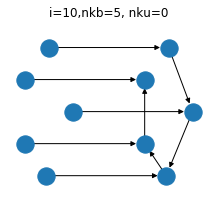

rooted at node 9


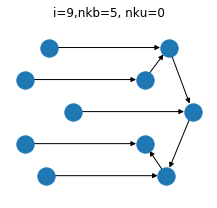

rooted at node 8


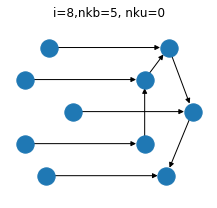

rooted at node 7


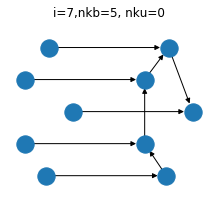

rooted at node 6


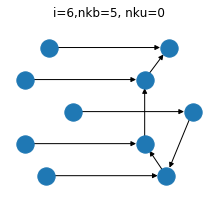

rooted at node 5
rooted at node 4
rooted at node 3
rooted at node 2
rooted at node 1
4
rooted at node 10


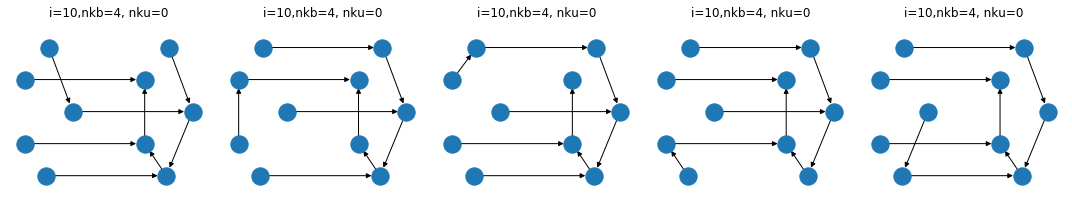

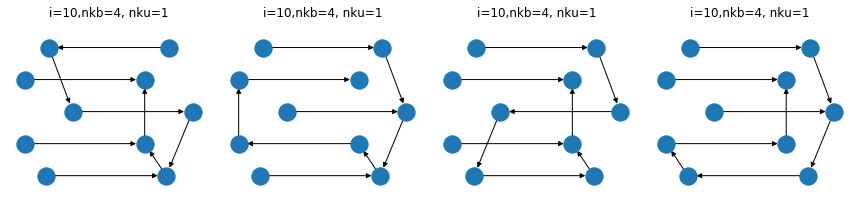

rooted at node 9


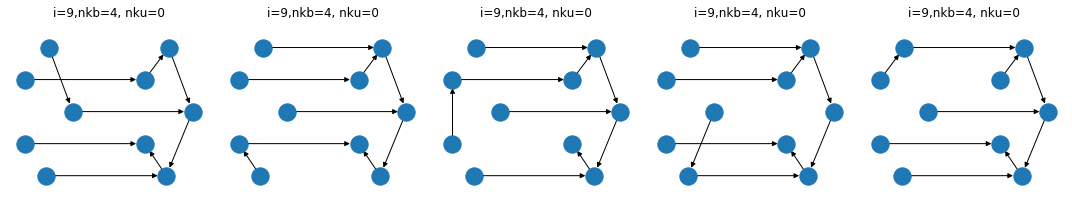

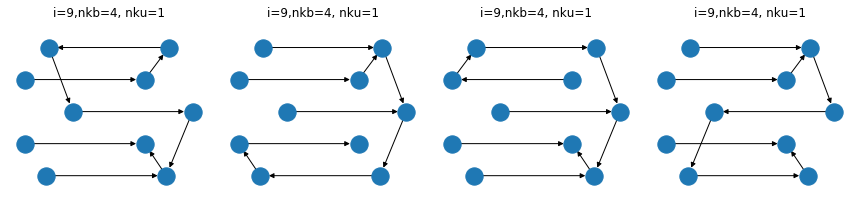

rooted at node 8


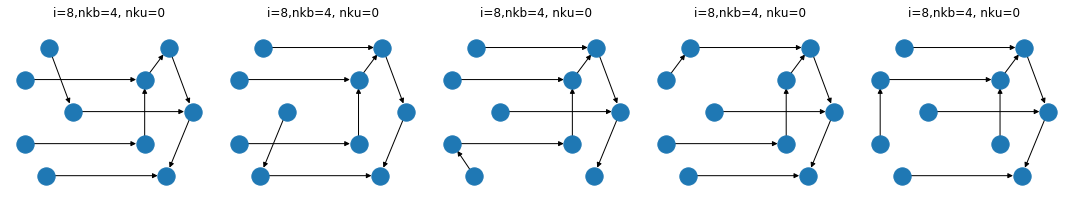

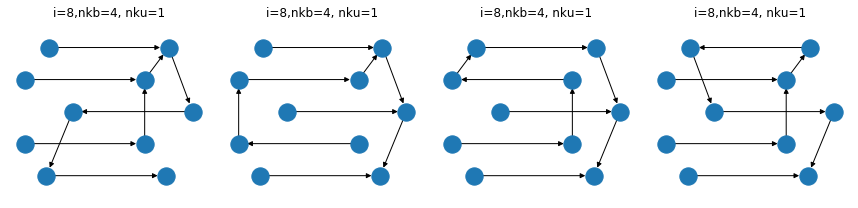

rooted at node 7


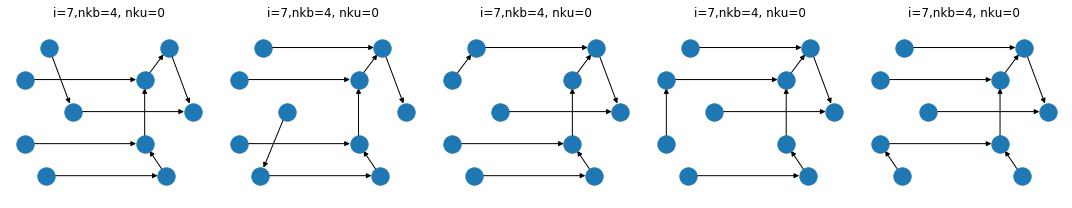

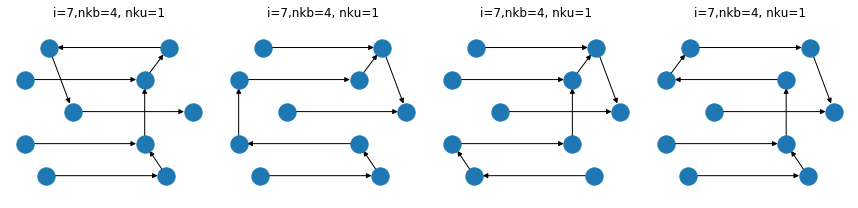

rooted at node 6


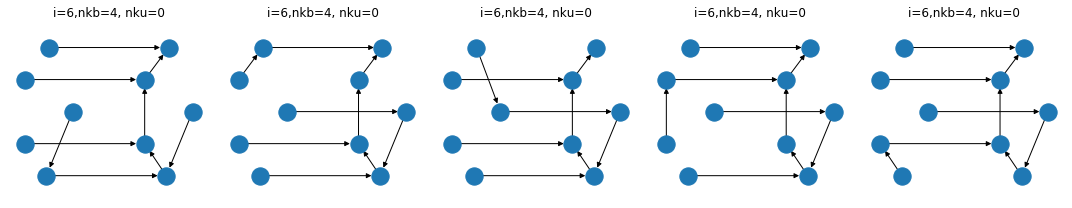

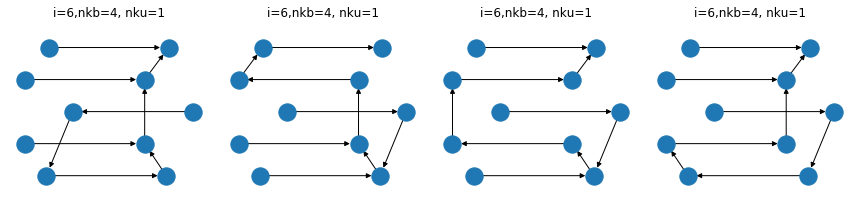

rooted at node 5


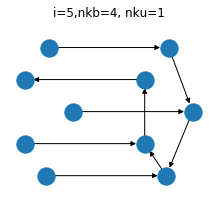

rooted at node 4


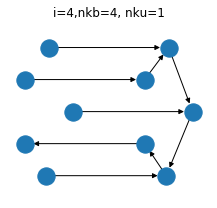

rooted at node 3


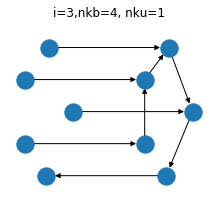

rooted at node 2


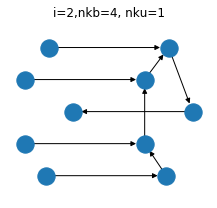

rooted at node 1


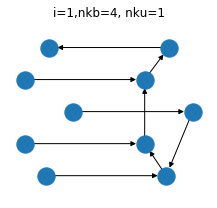

3
rooted at node 10


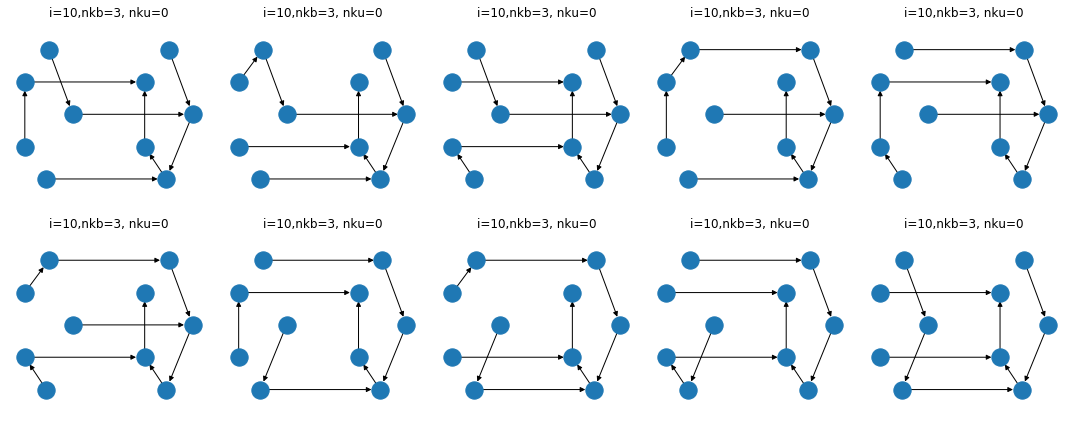

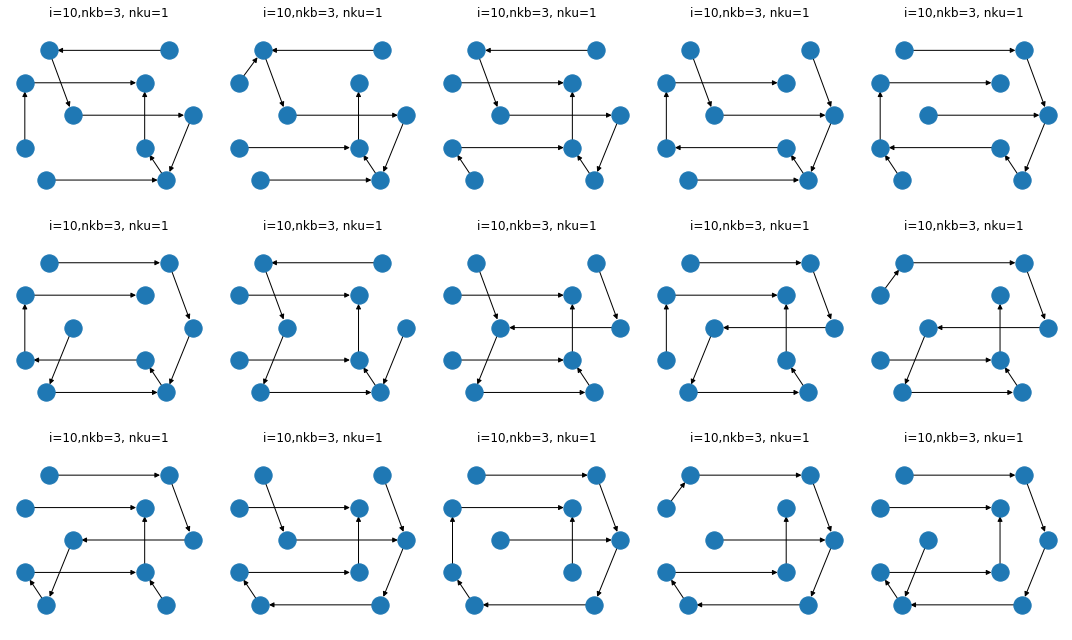

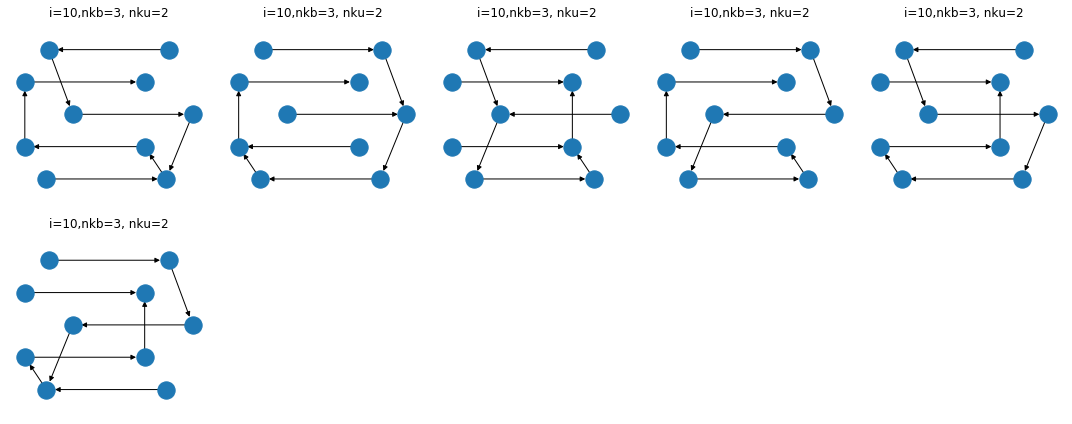

rooted at node 9


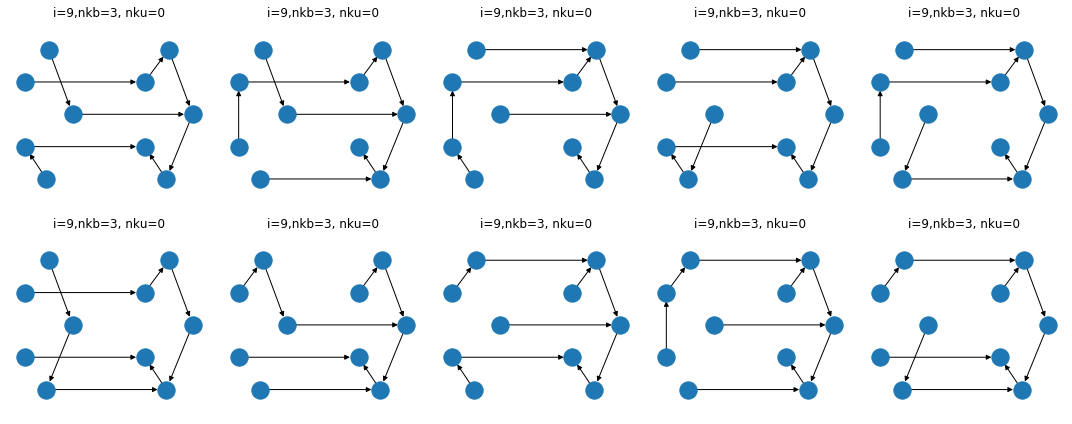

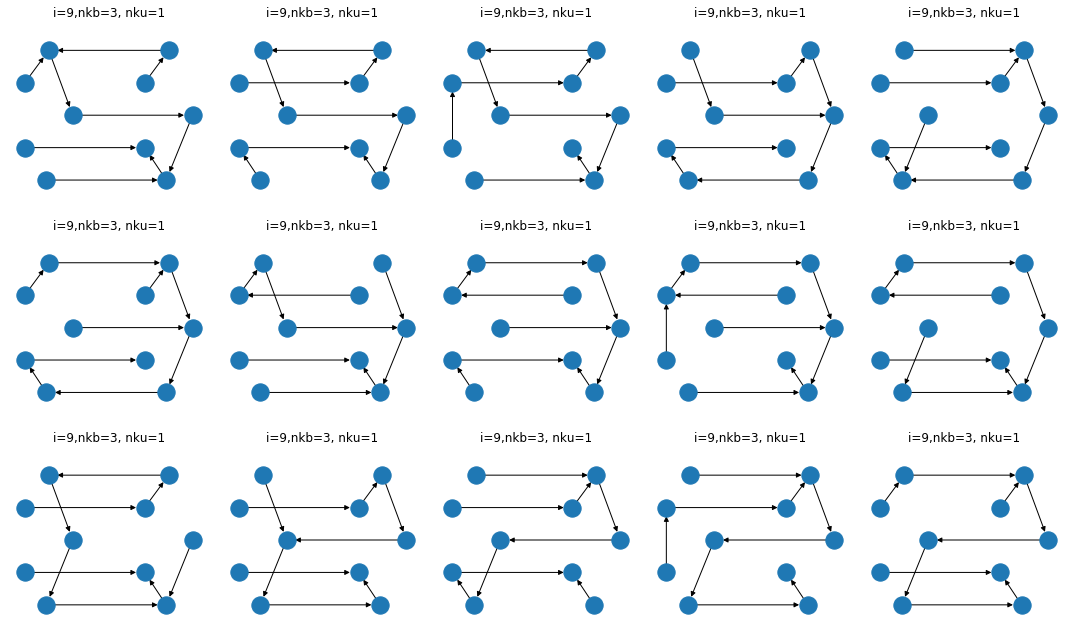

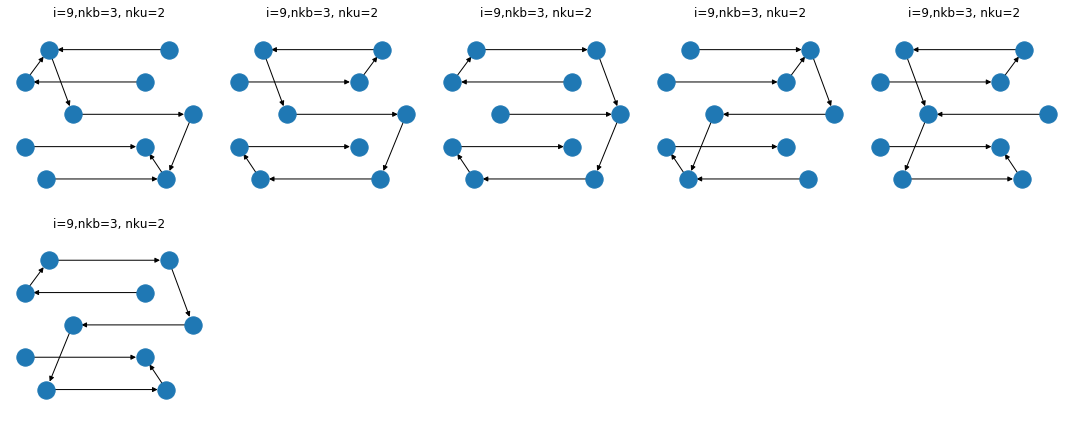

rooted at node 8


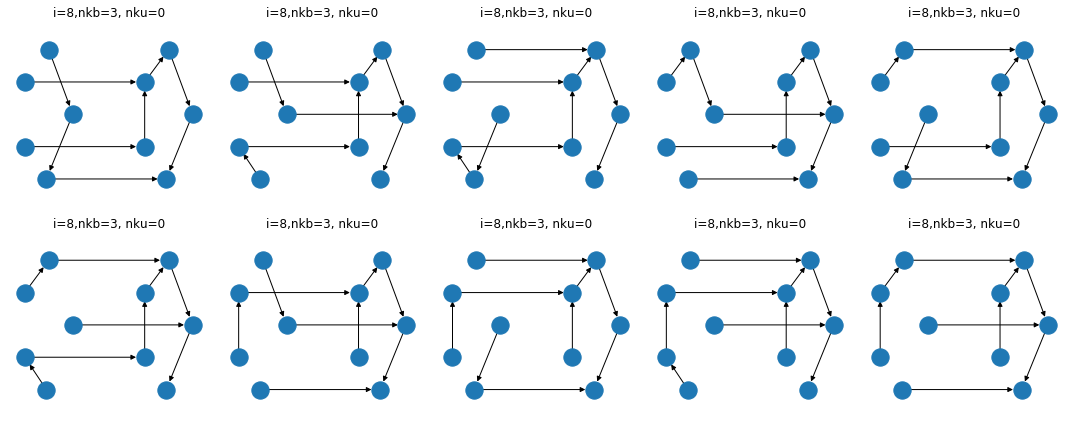

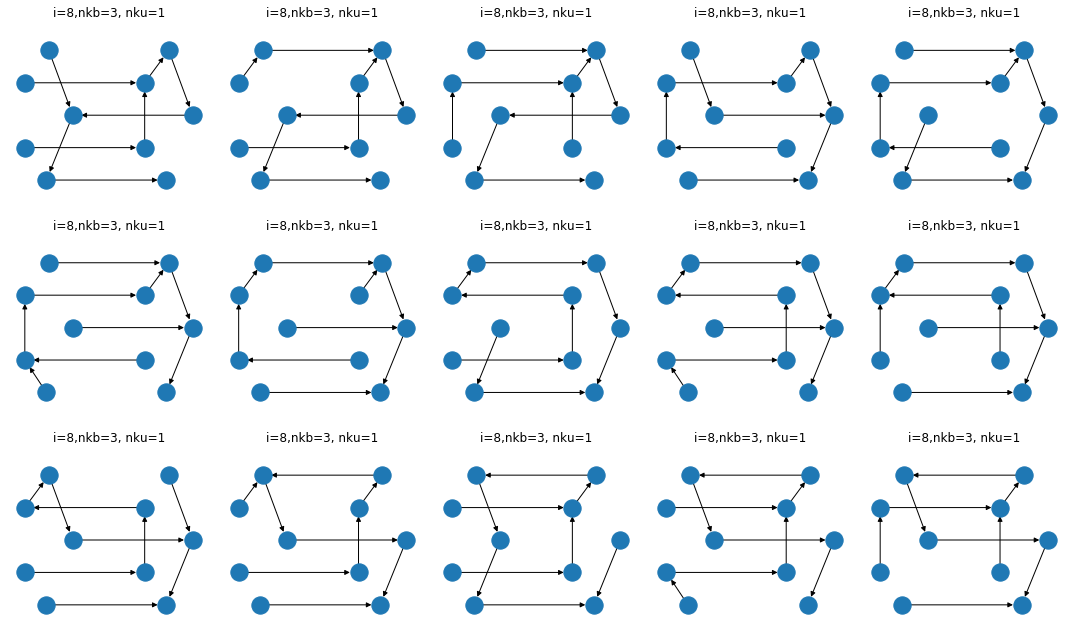

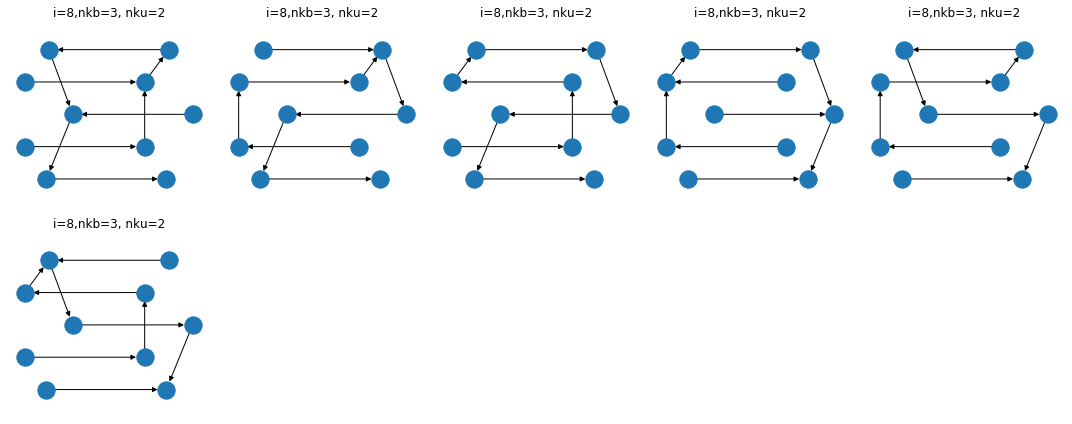

rooted at node 7


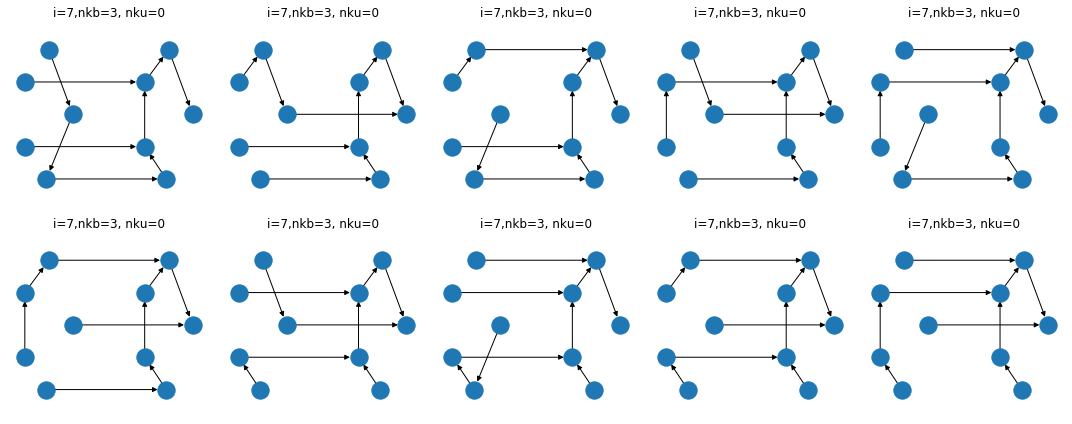

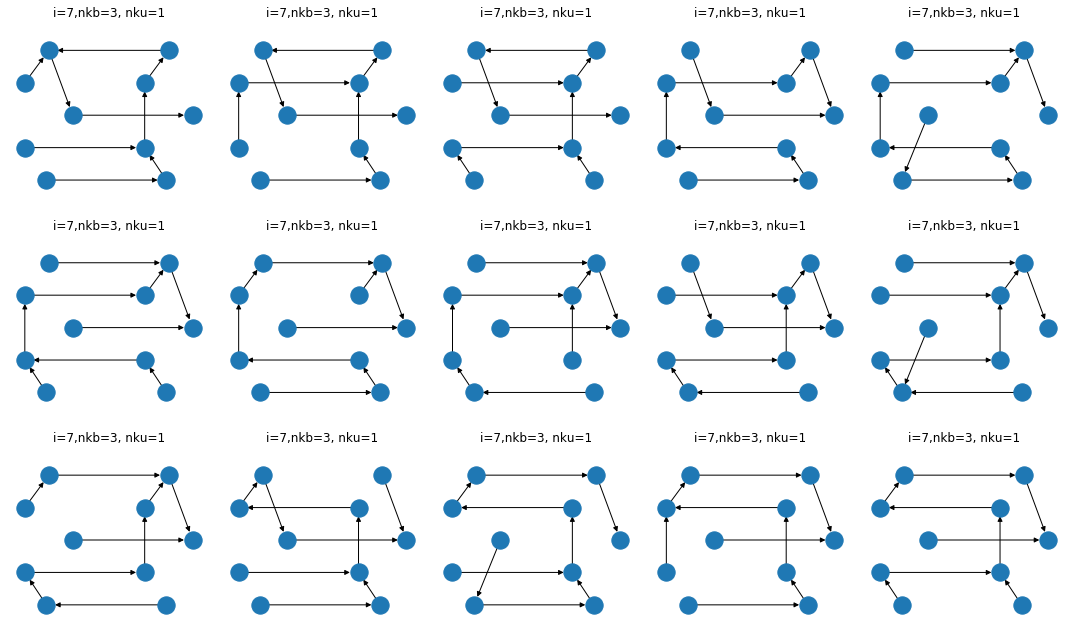

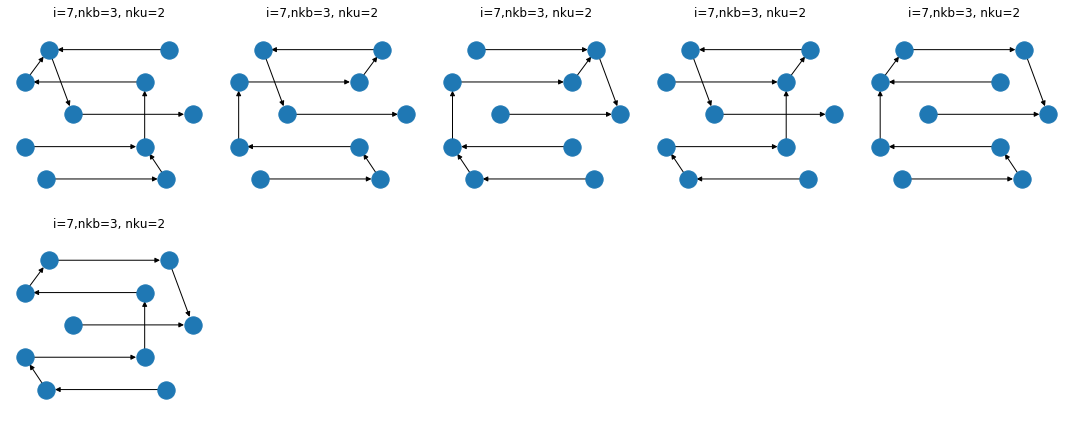

rooted at node 6


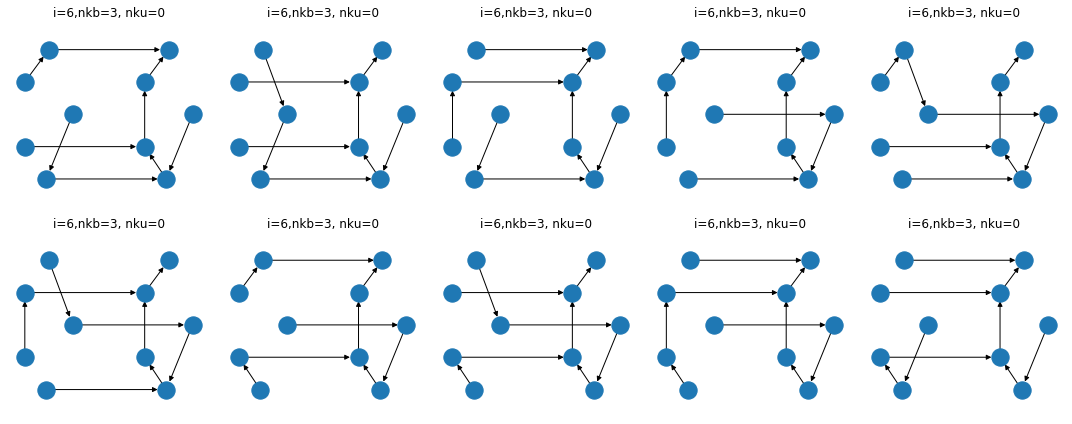

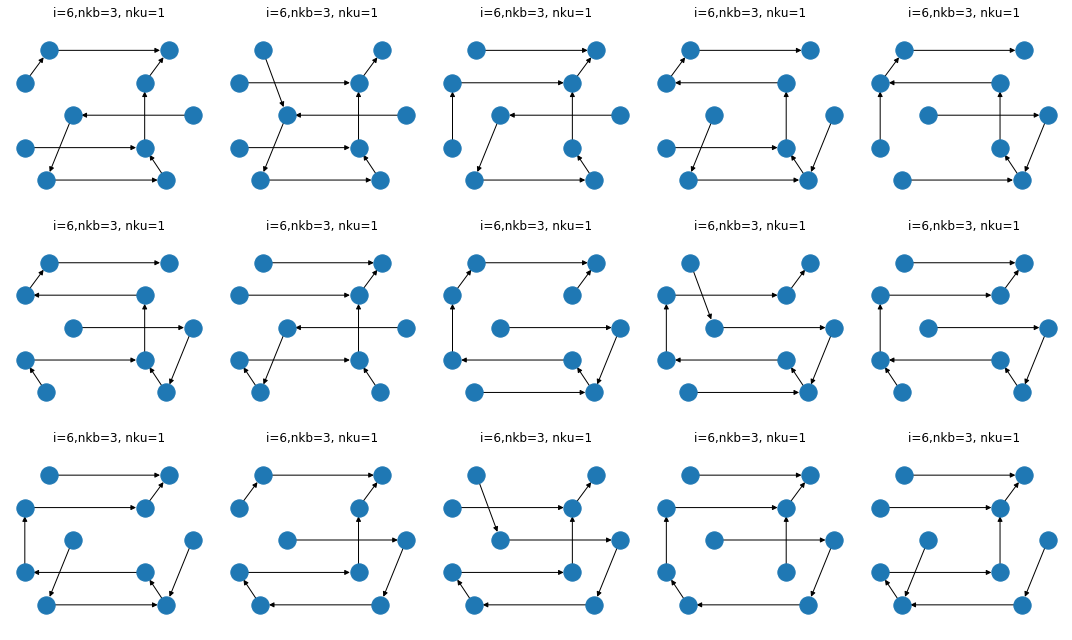

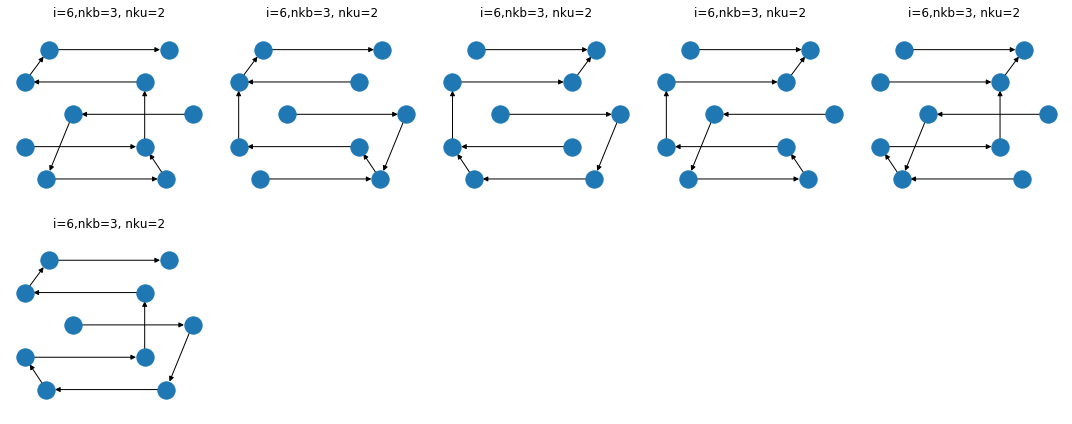

rooted at node 5


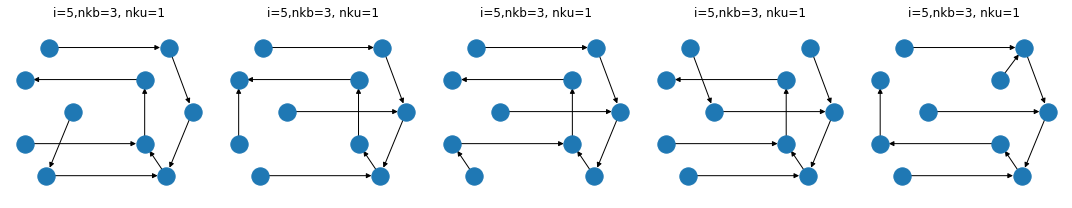

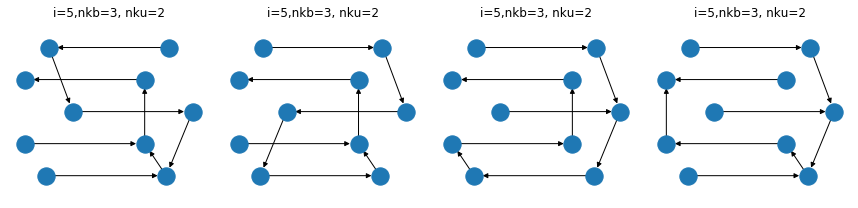

rooted at node 4


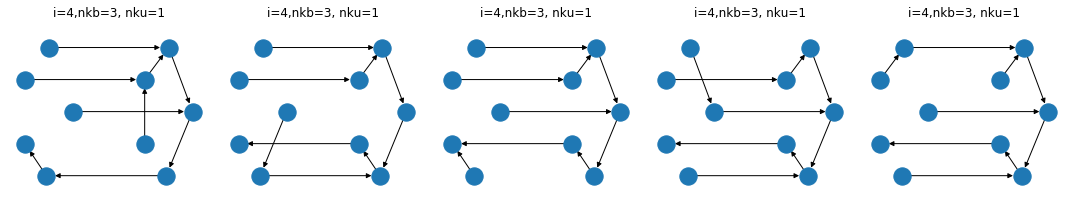

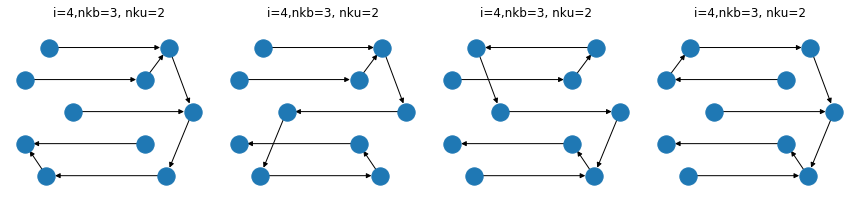

rooted at node 3


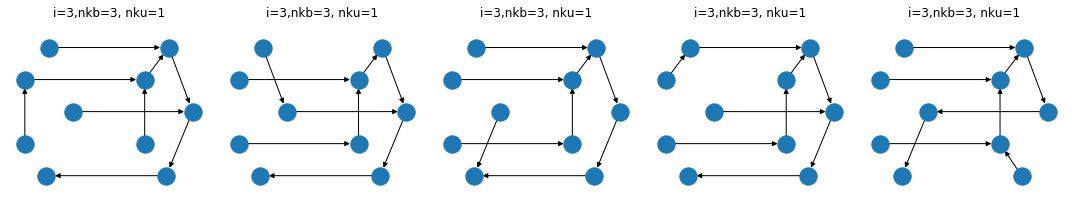

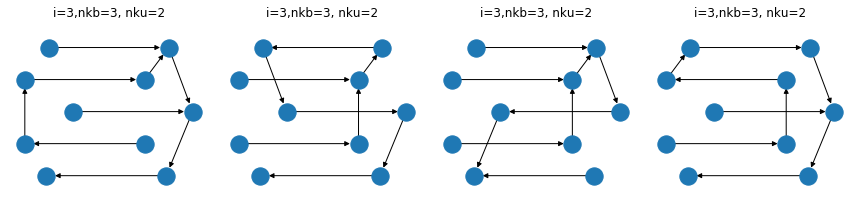

rooted at node 2


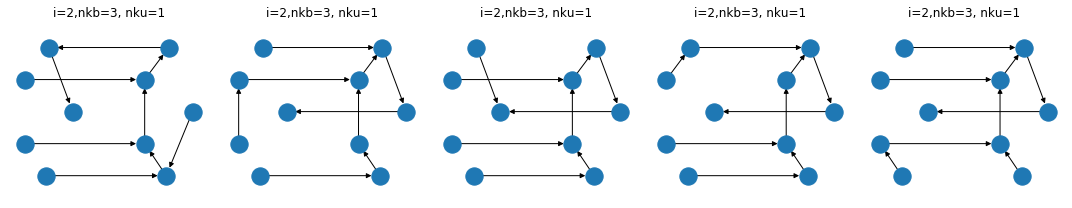

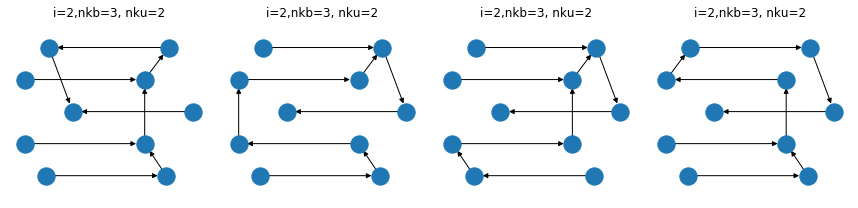

rooted at node 1


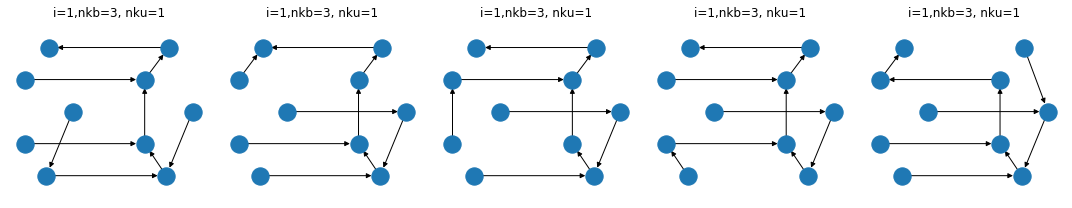

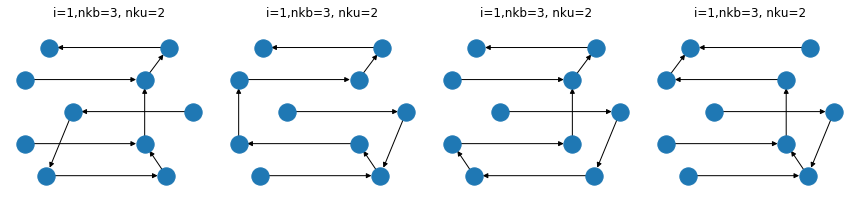

2
rooted at node 10


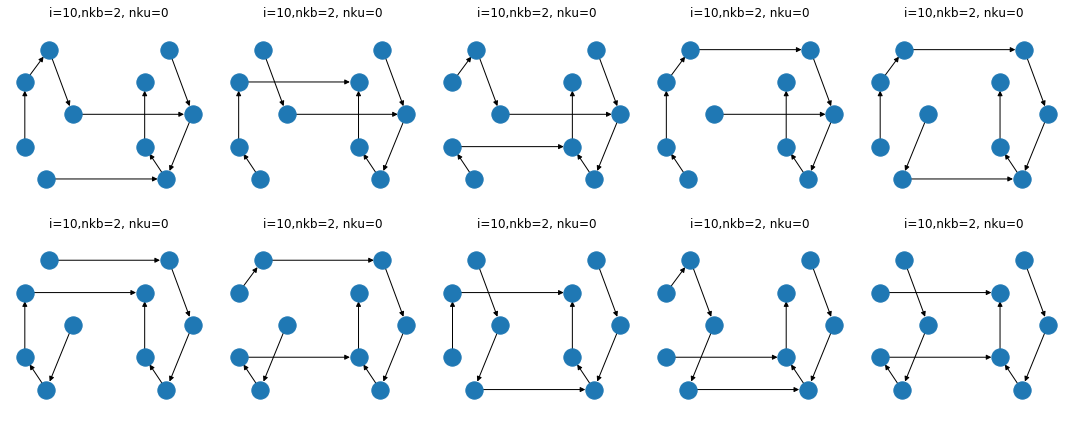

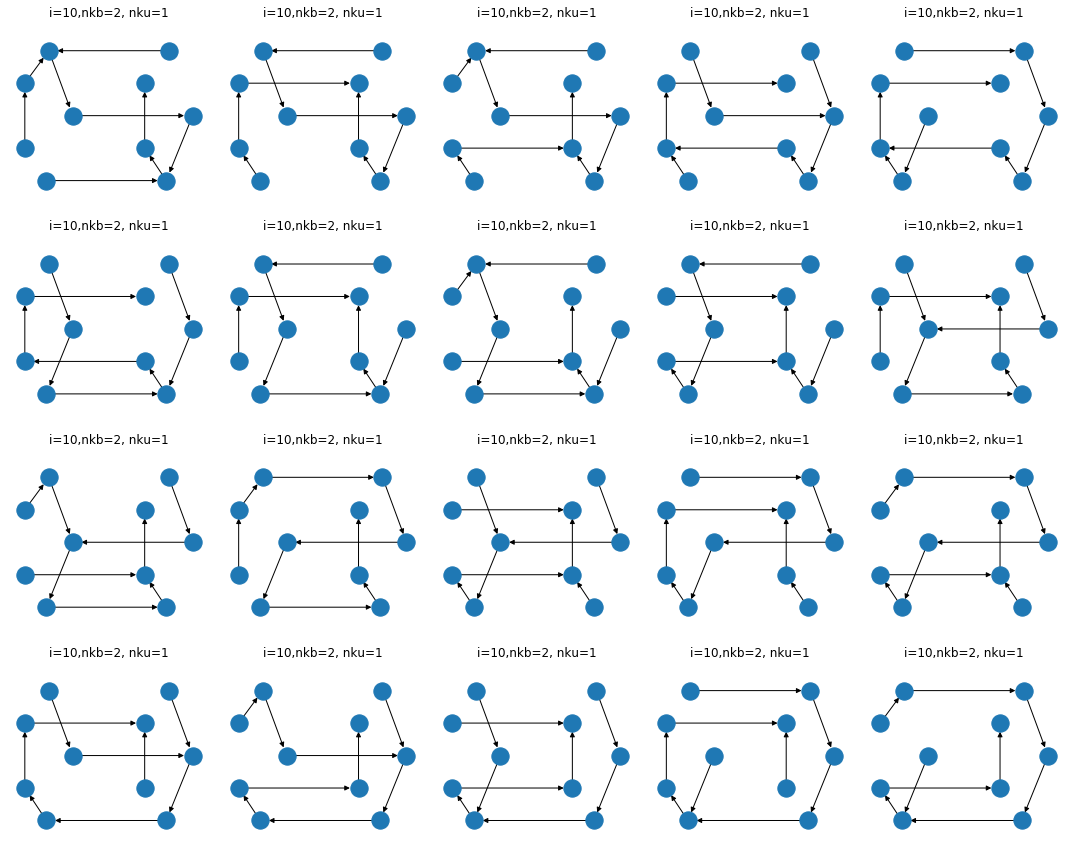

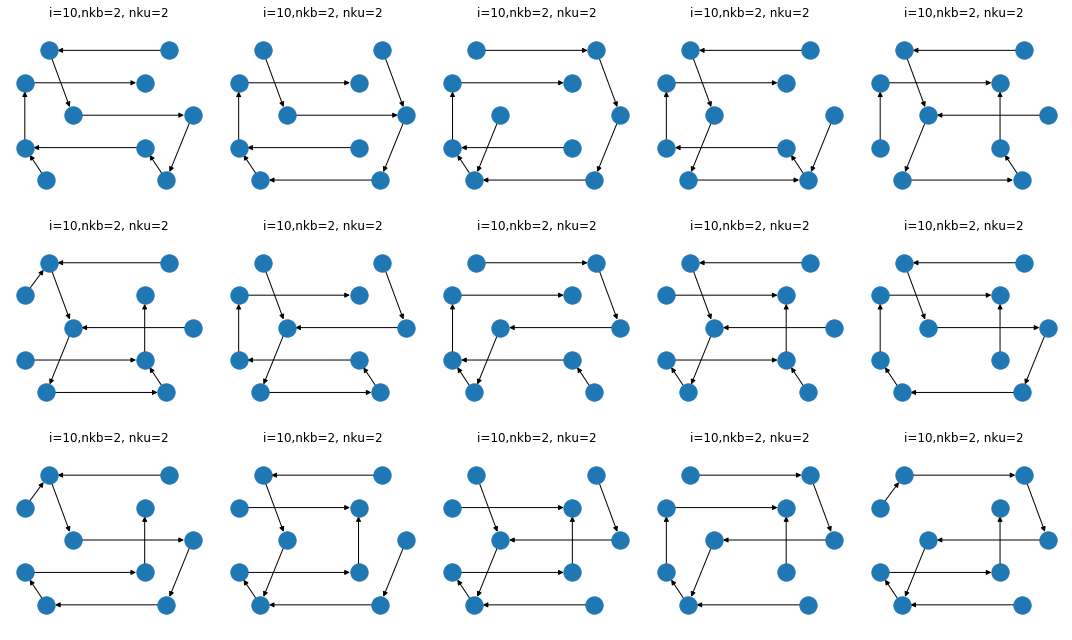

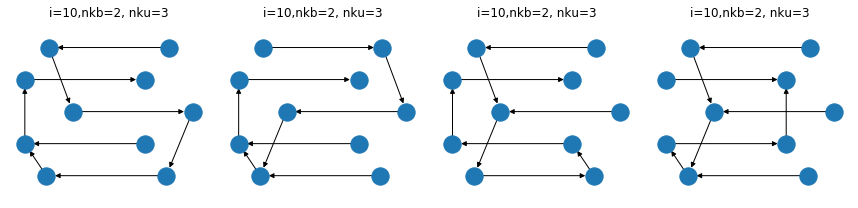

rooted at node 9


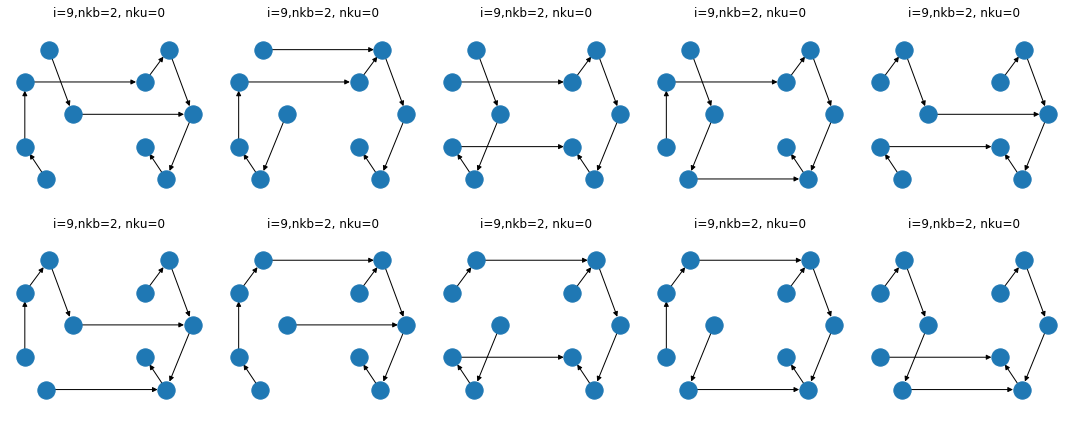

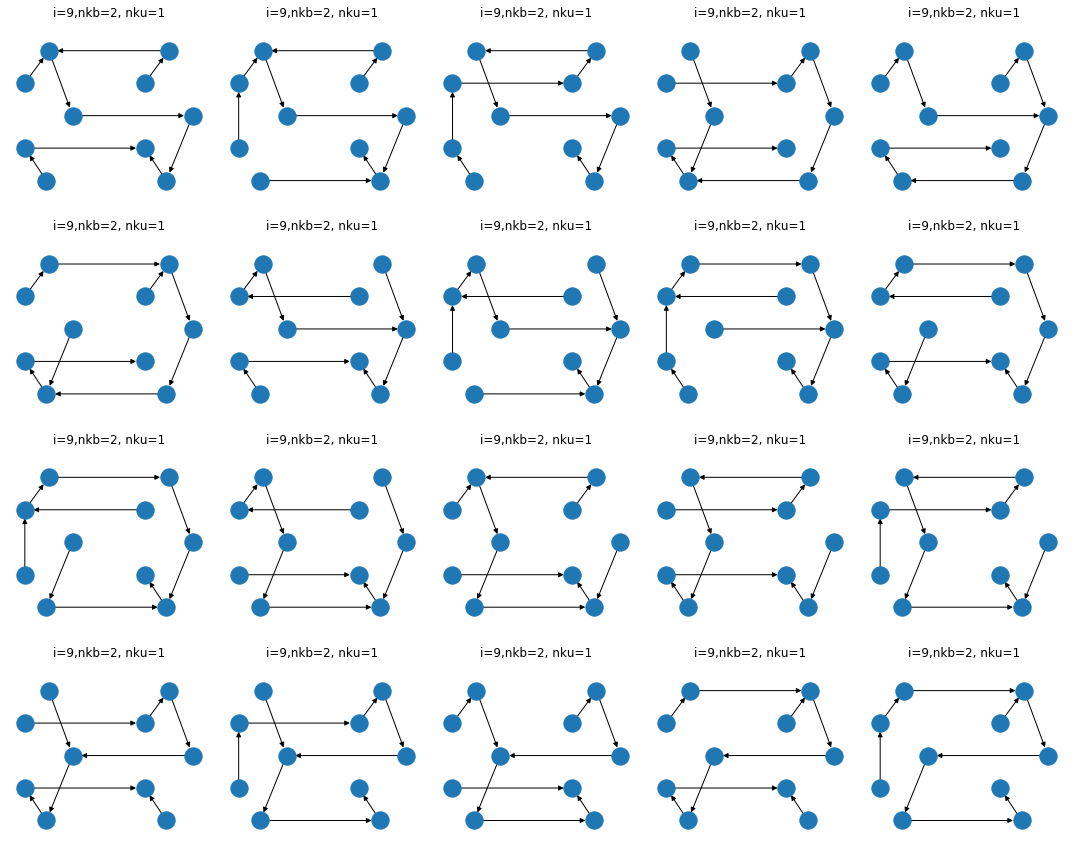

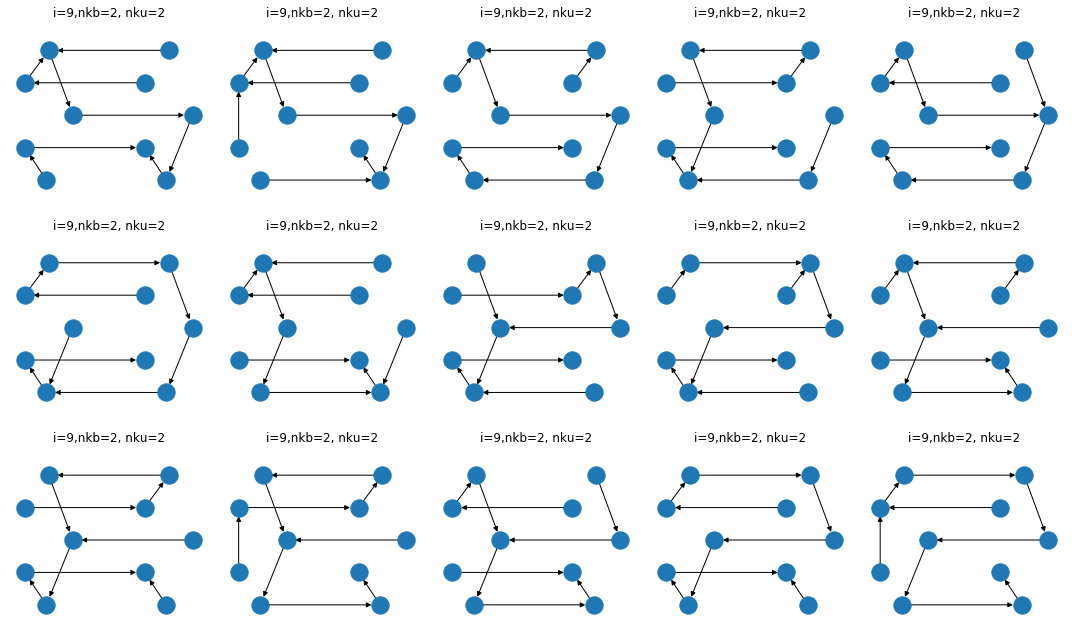

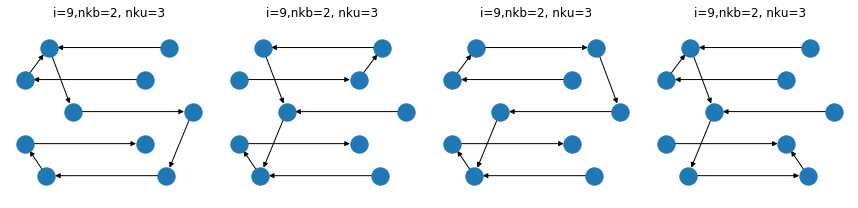

rooted at node 8


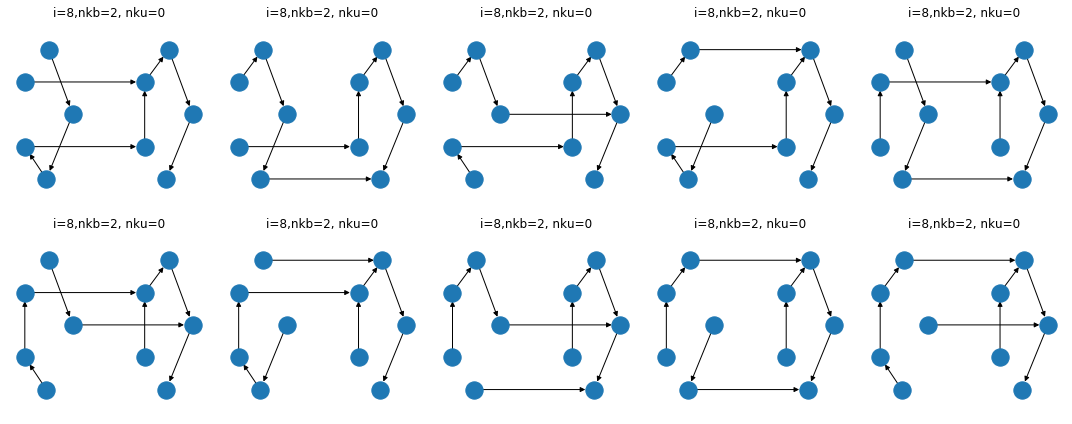

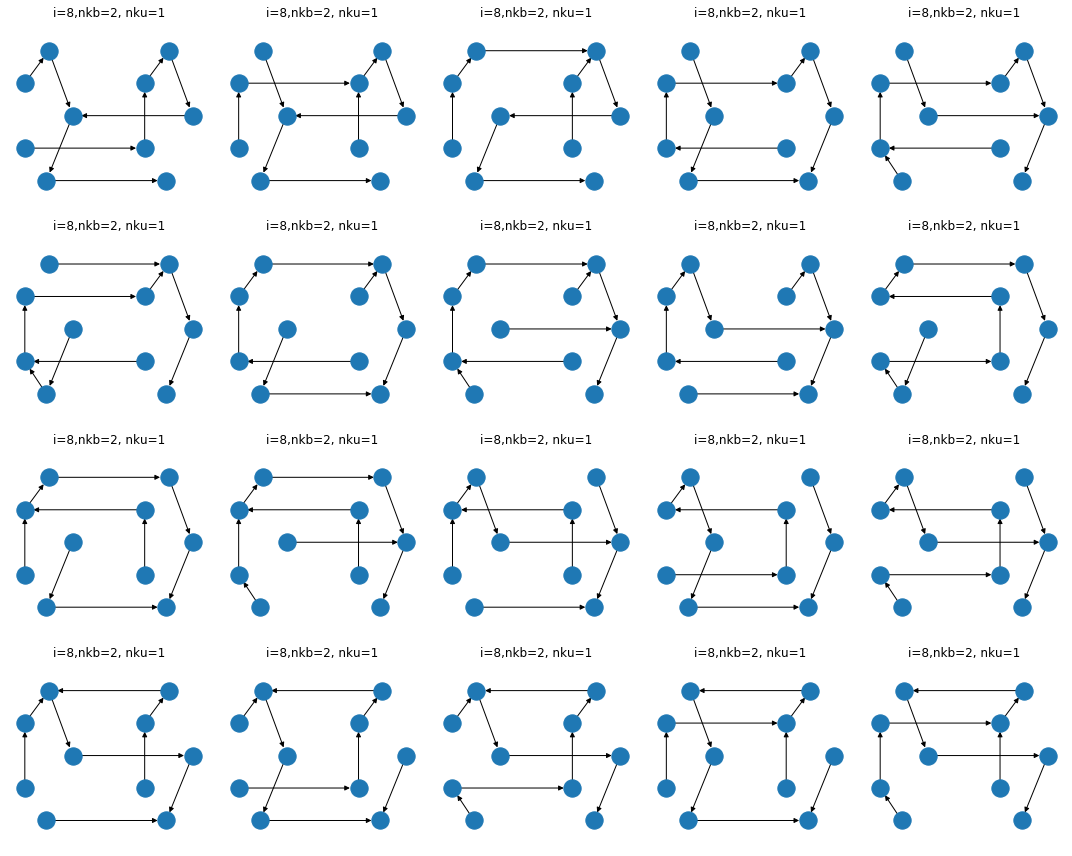

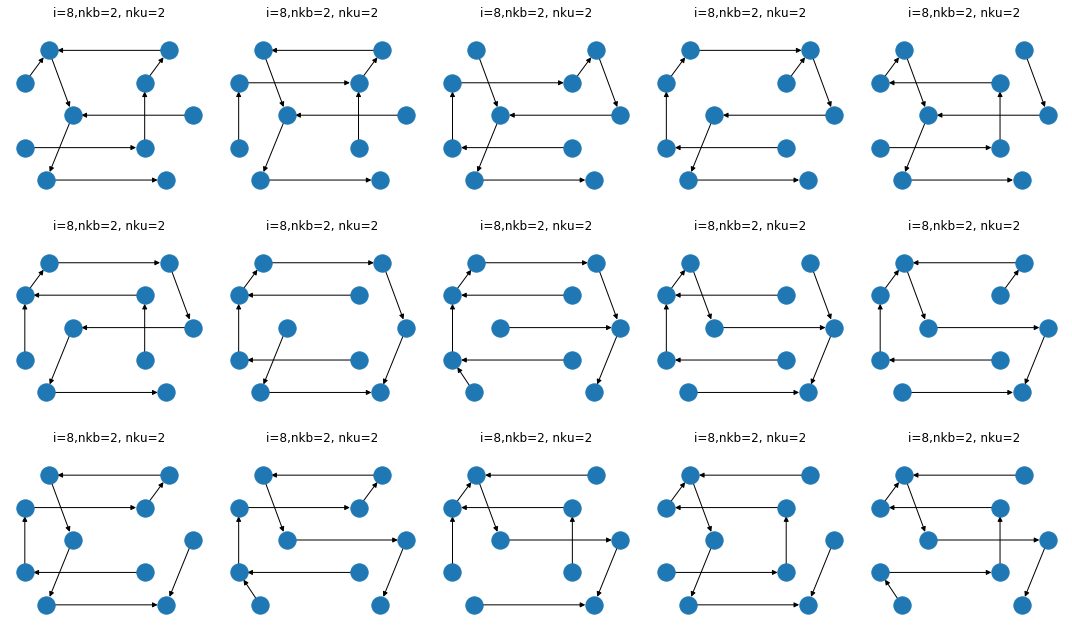

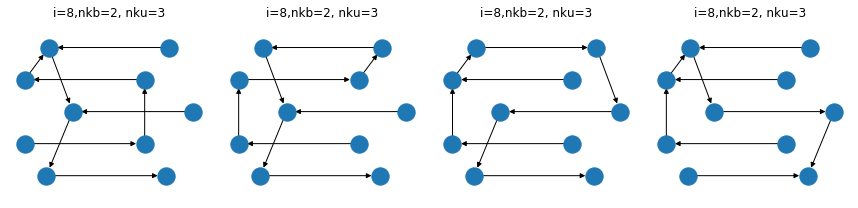

rooted at node 7


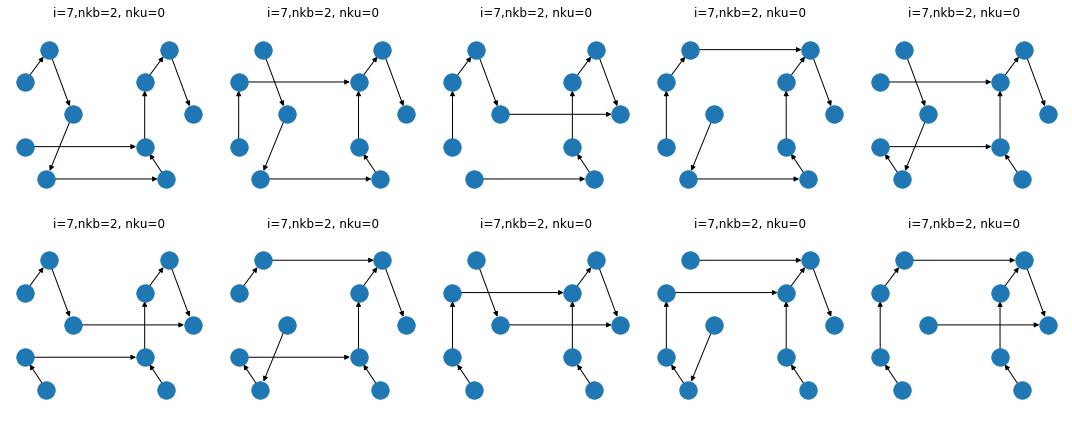

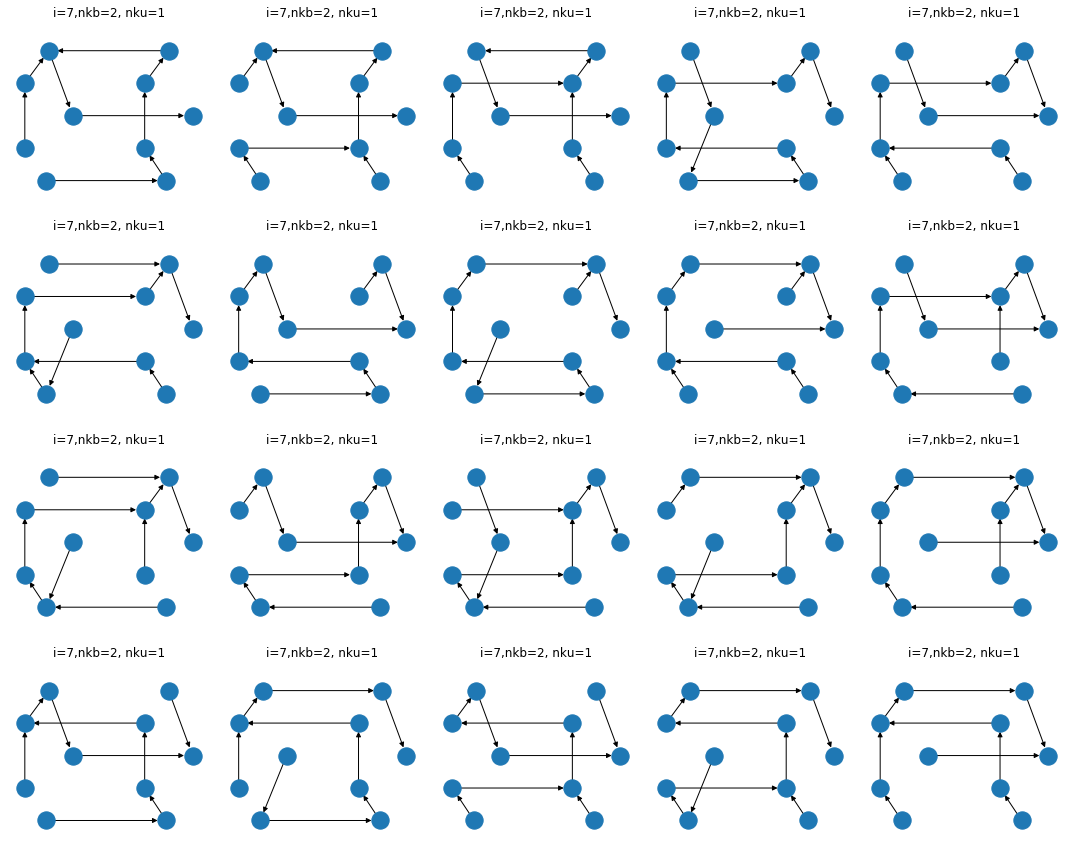

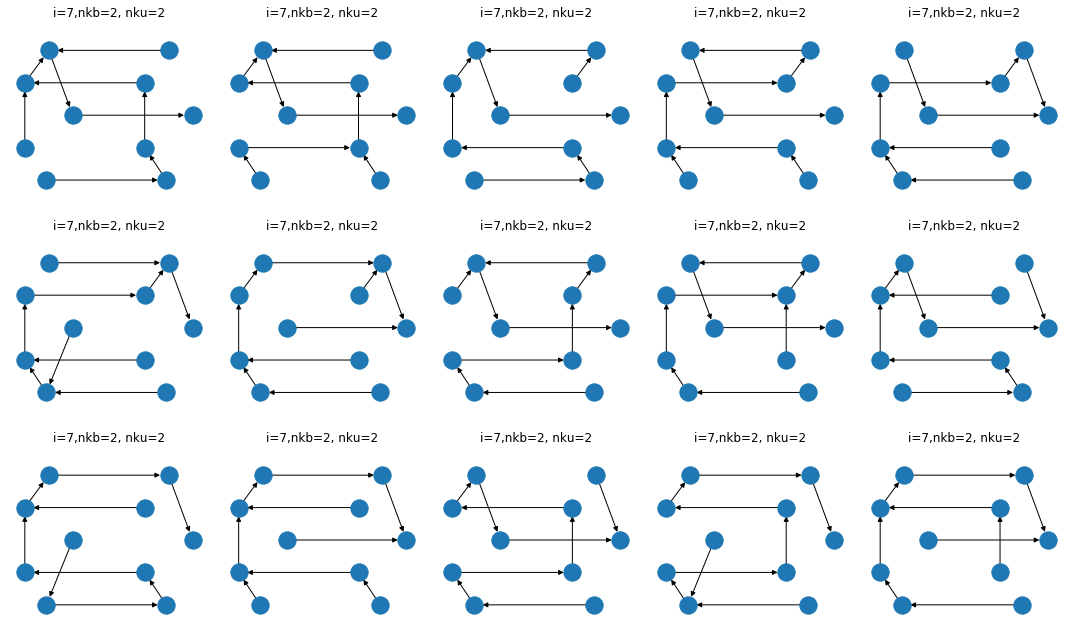

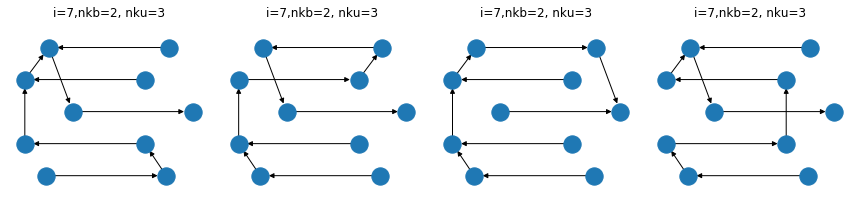

rooted at node 6


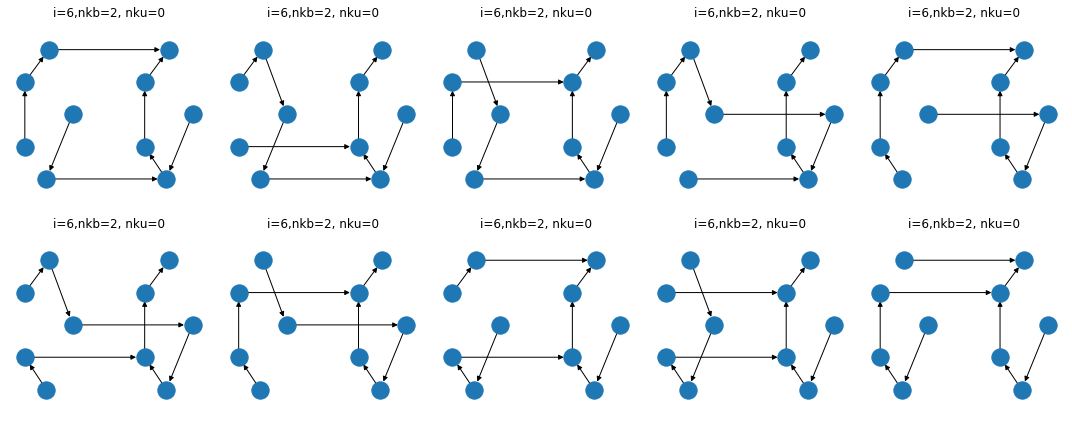

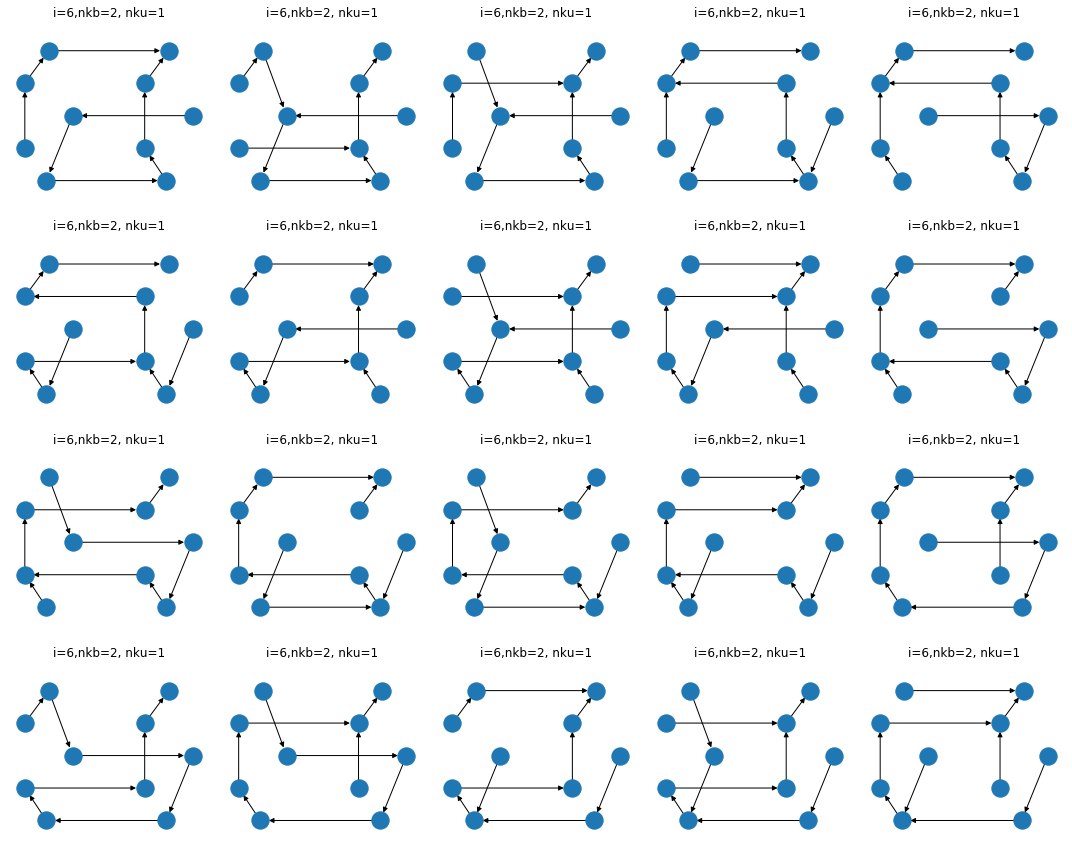

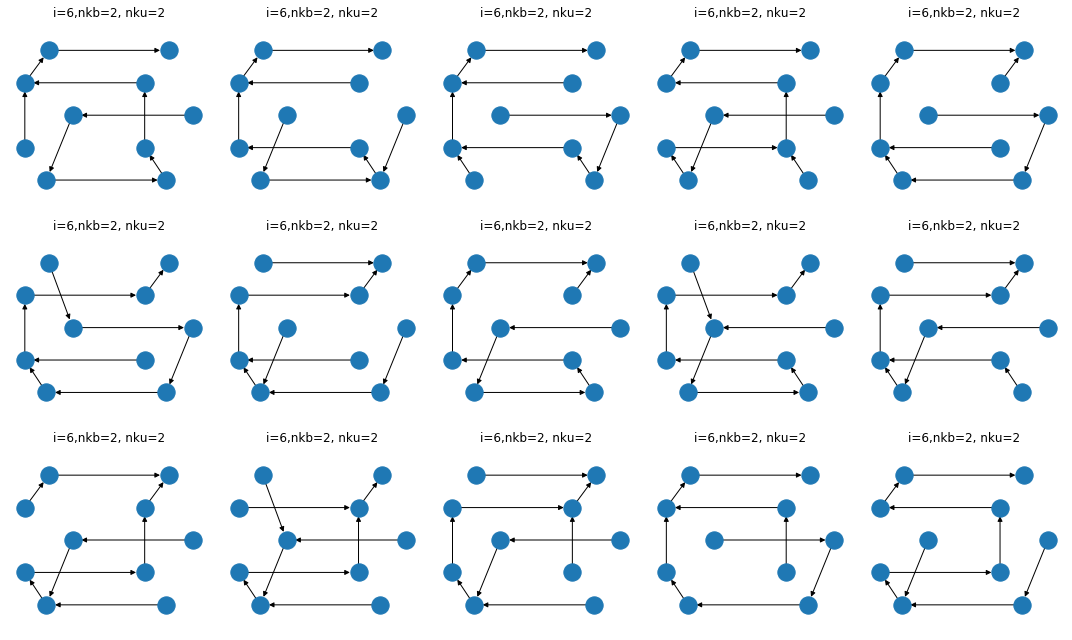

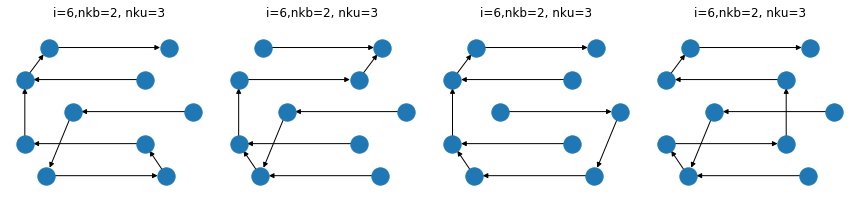

rooted at node 5


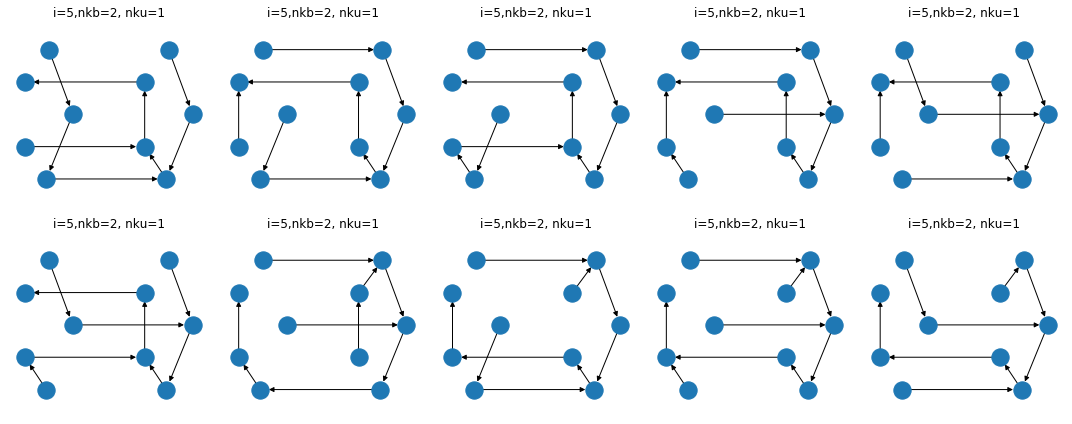

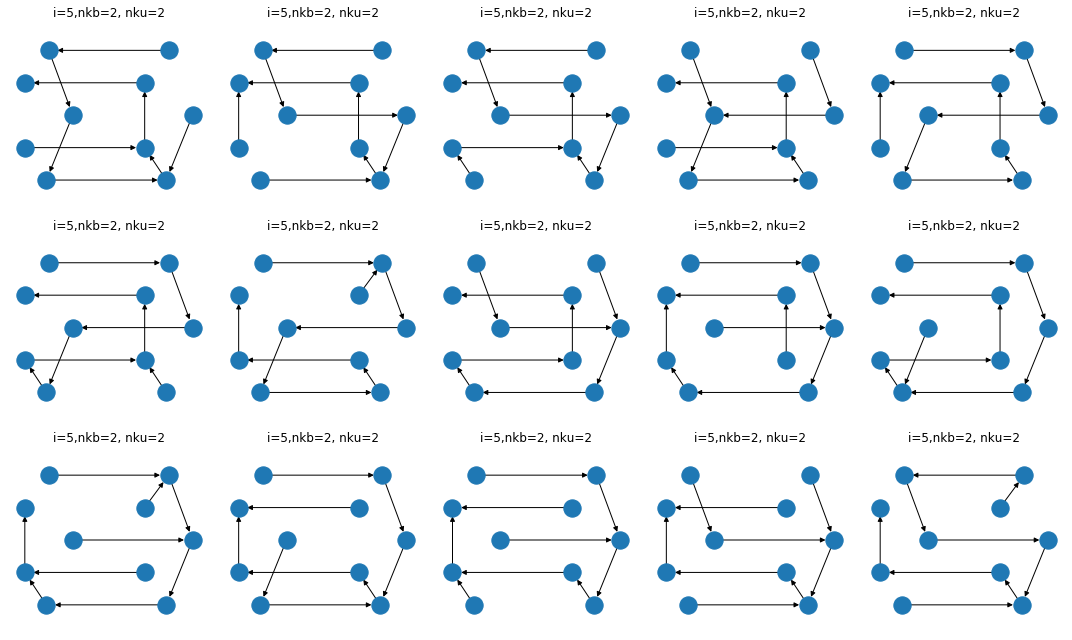

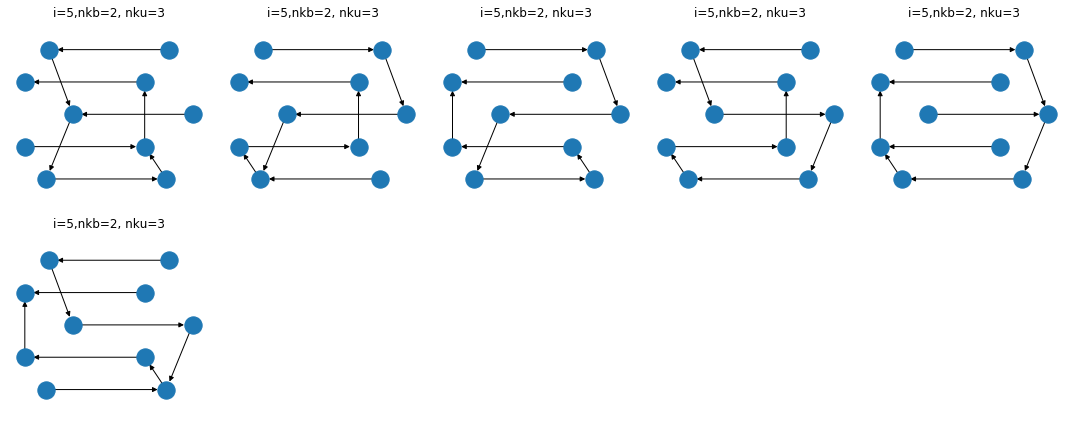

rooted at node 4


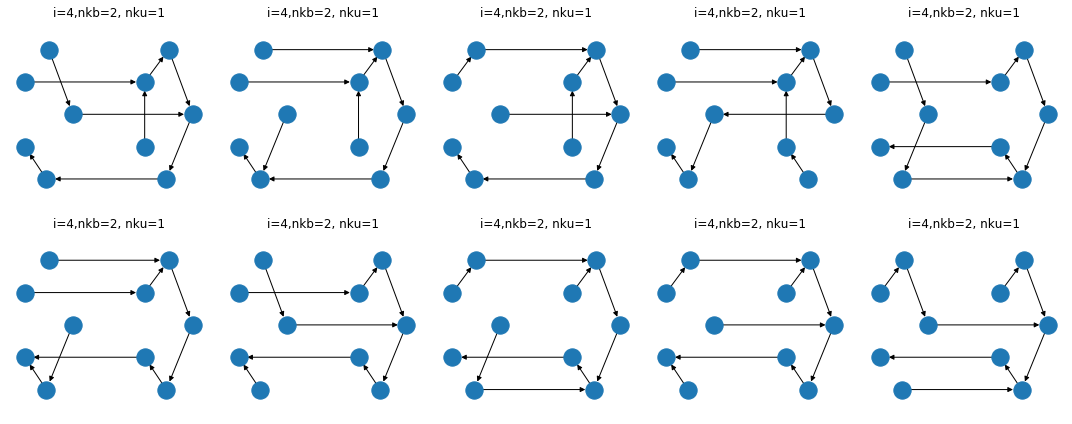

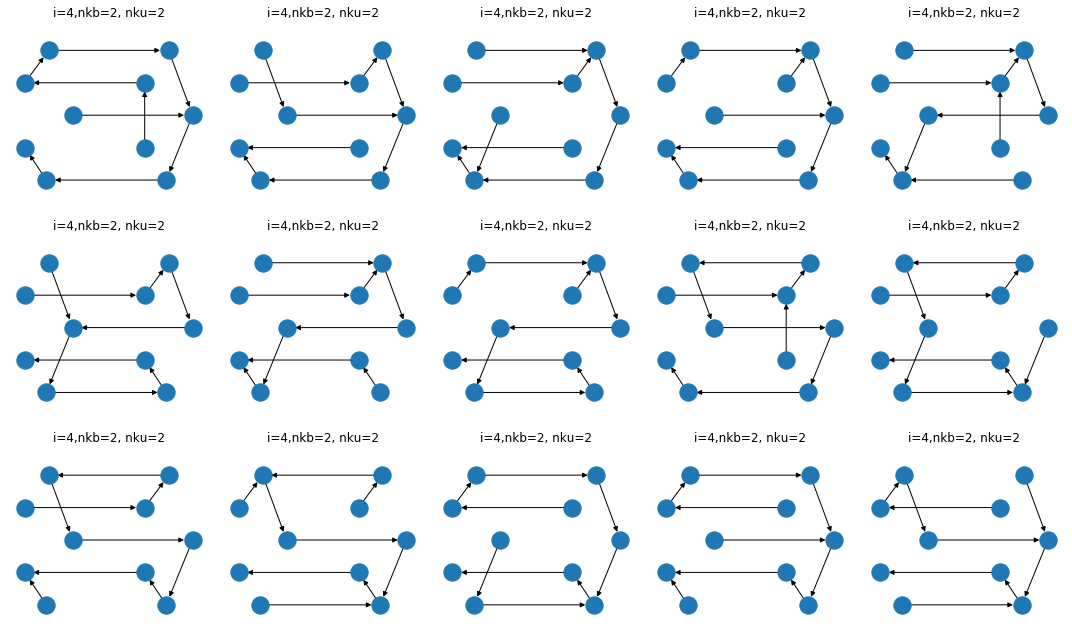

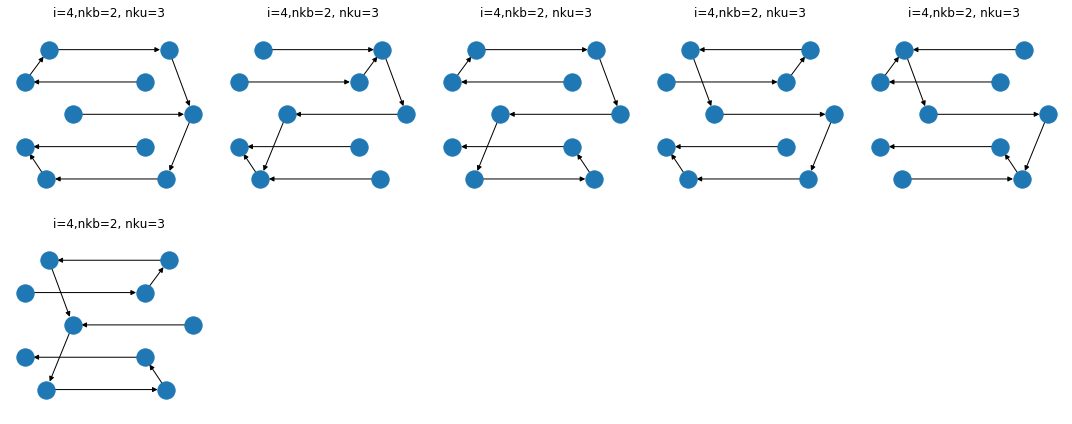

rooted at node 3


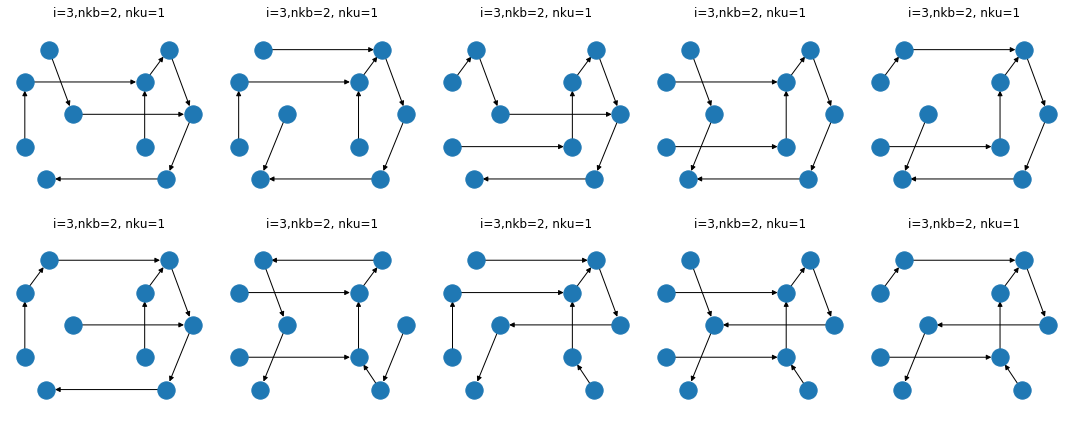

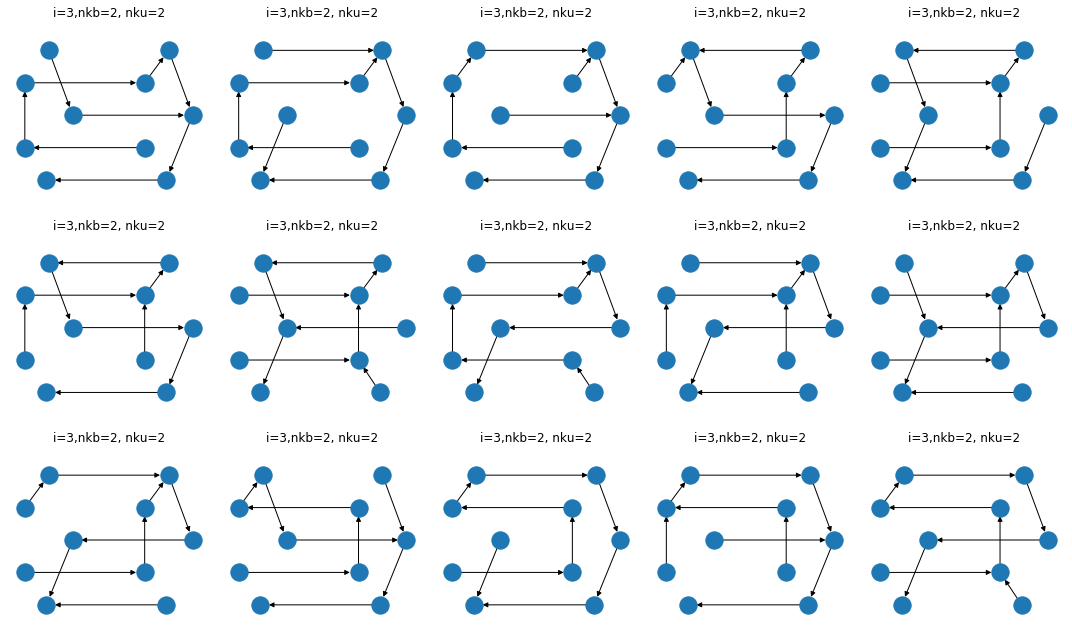

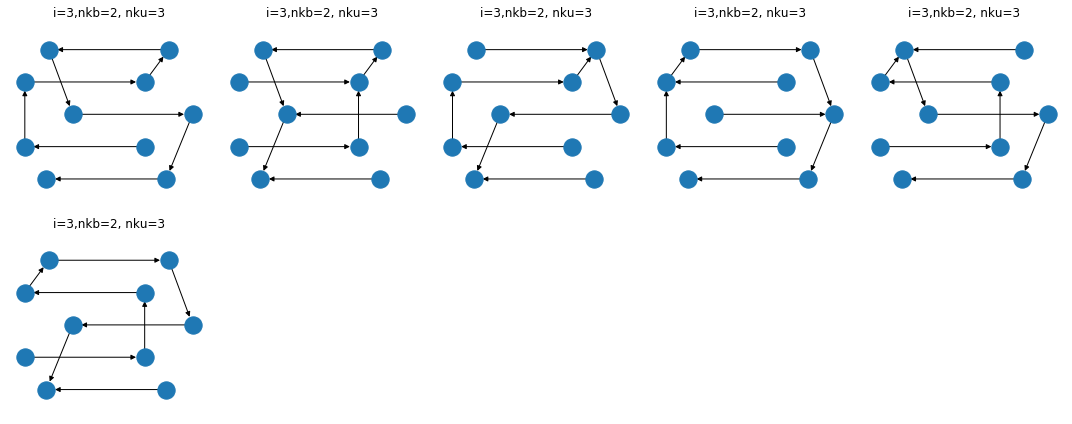

rooted at node 2


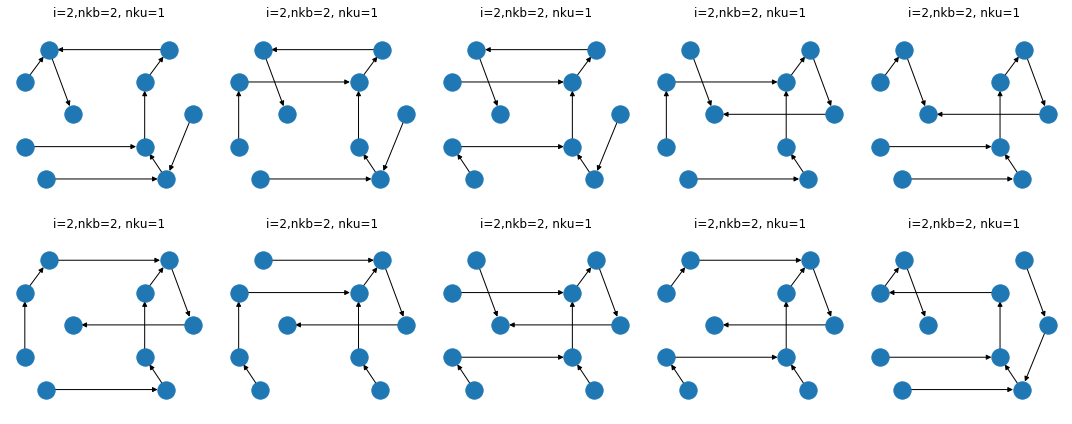

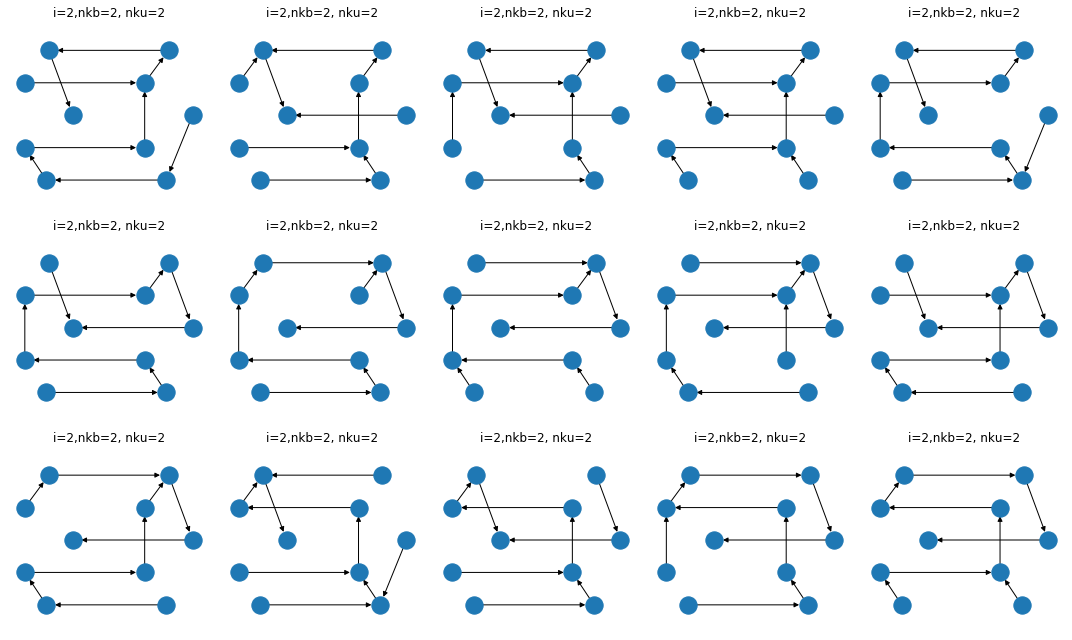

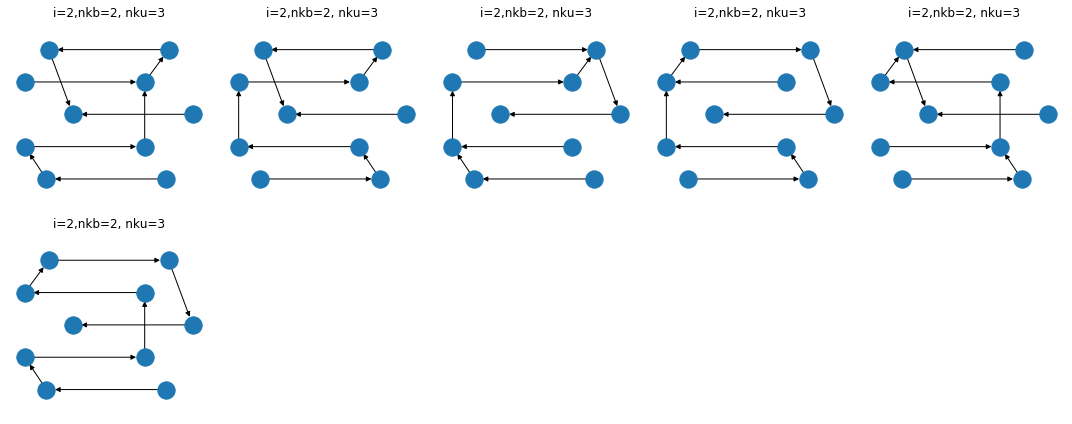

rooted at node 1


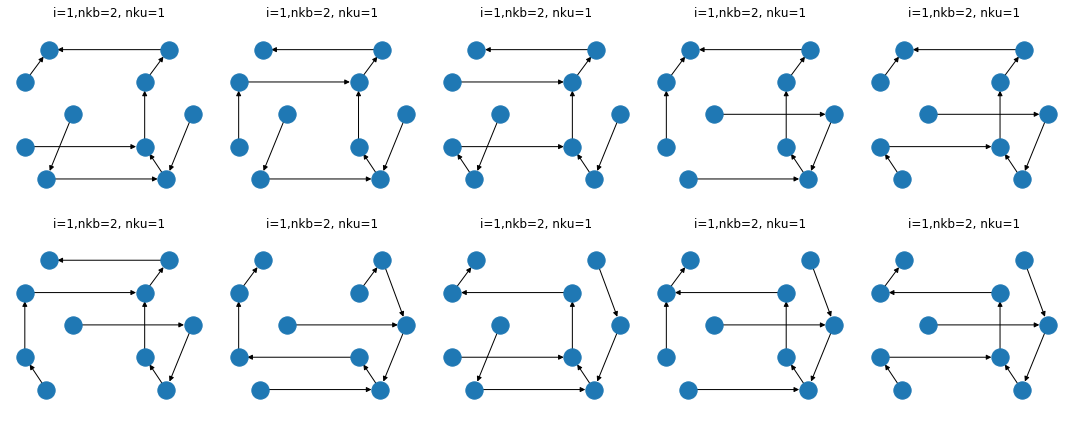

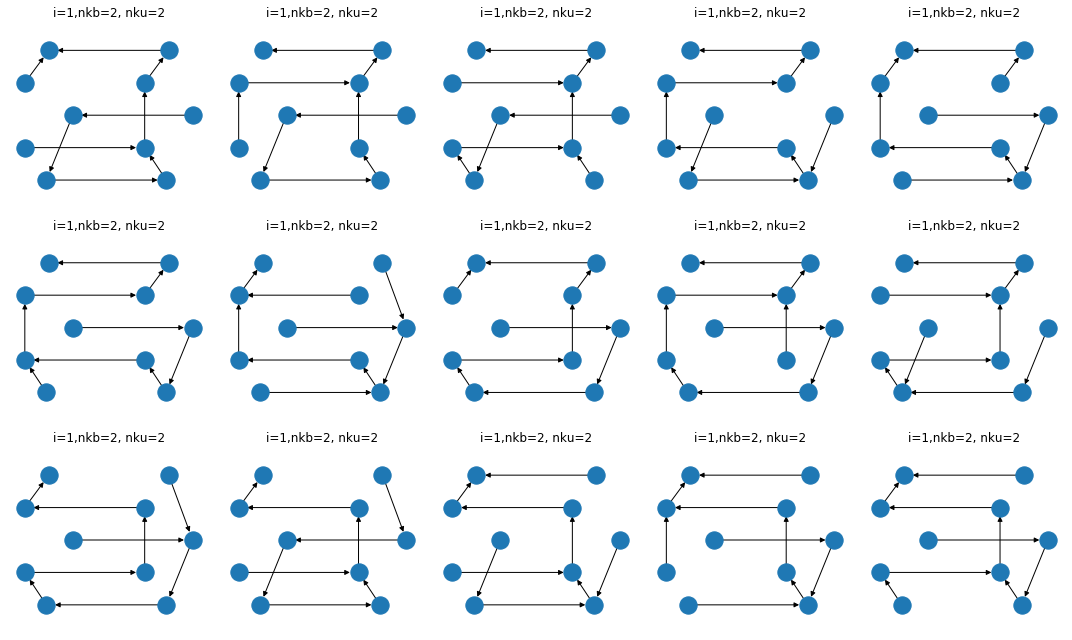

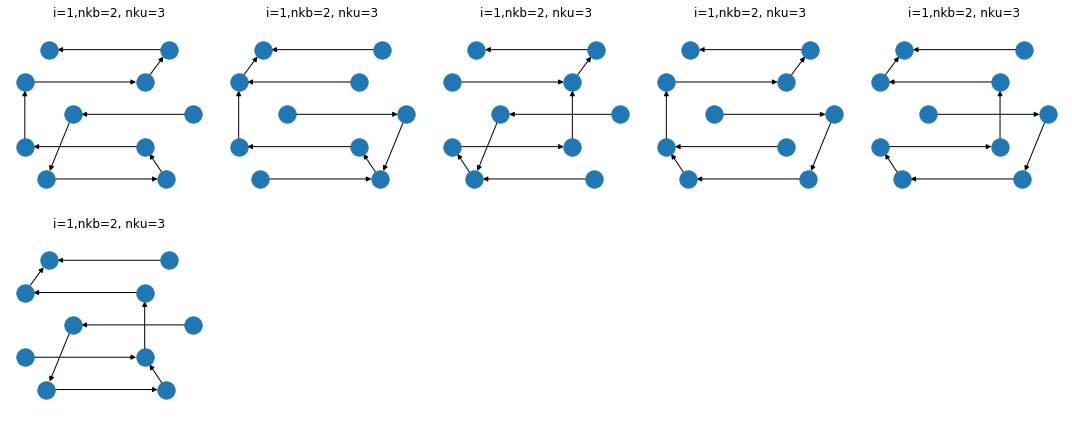

1
rooted at node 10


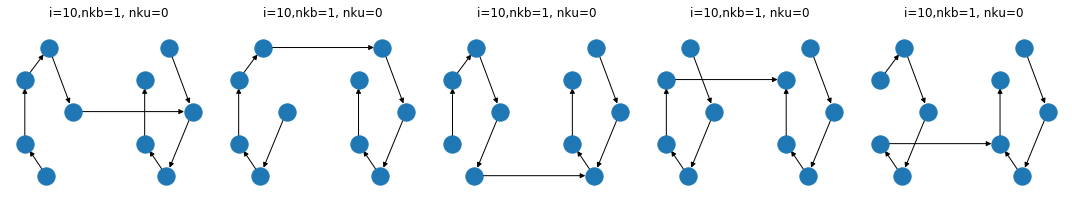

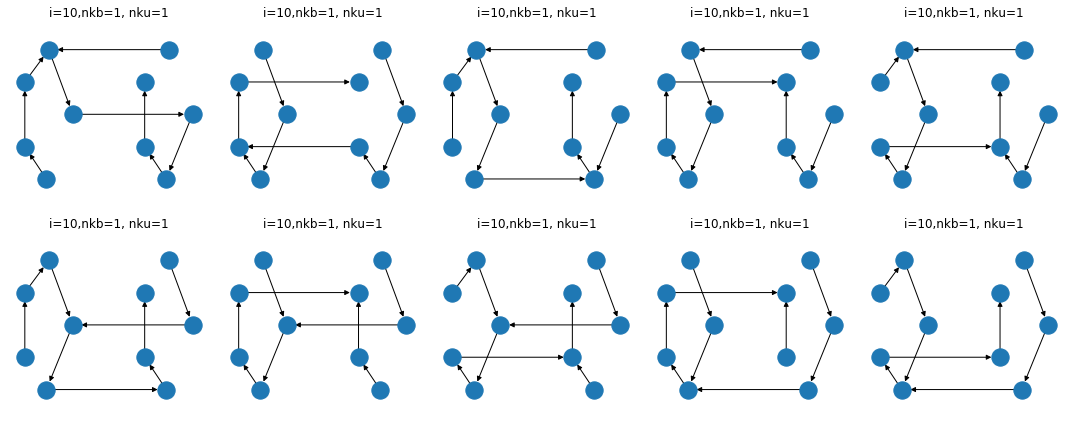

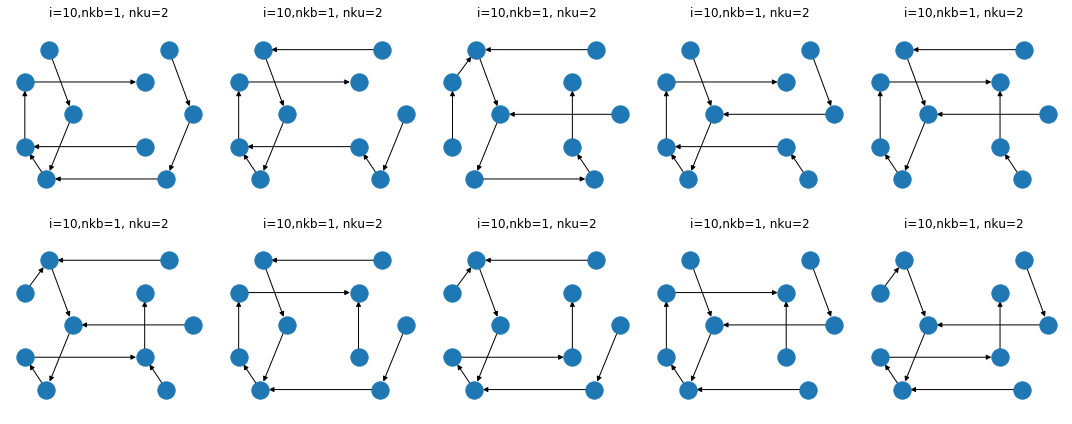

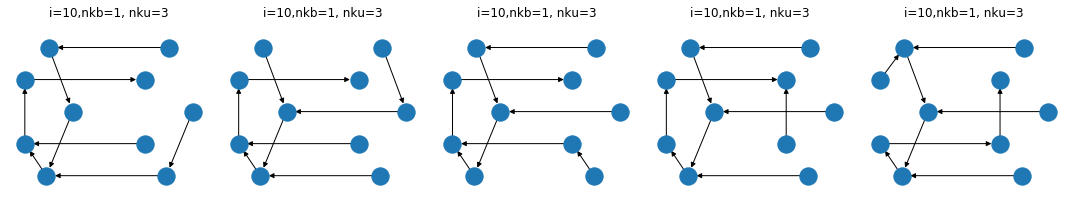

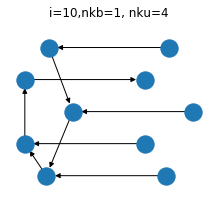

rooted at node 9


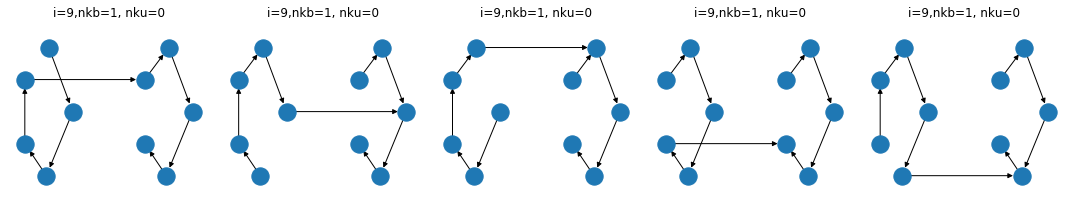

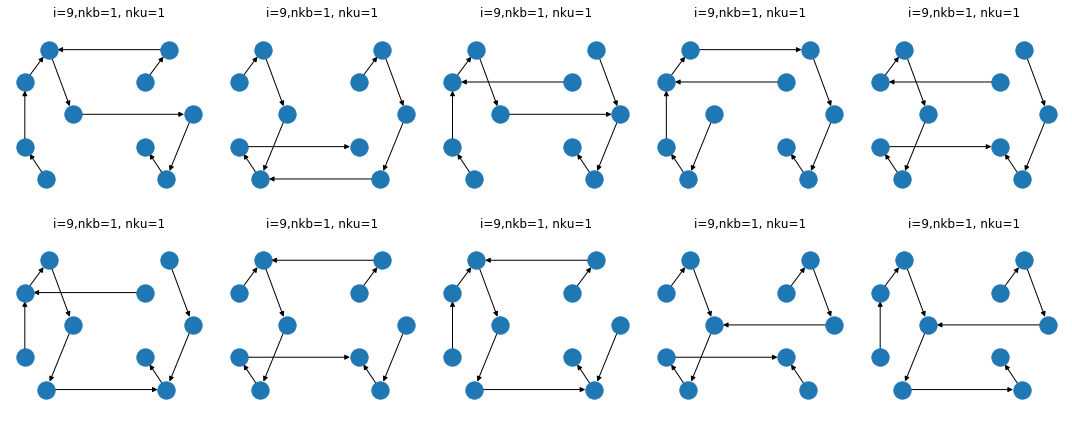

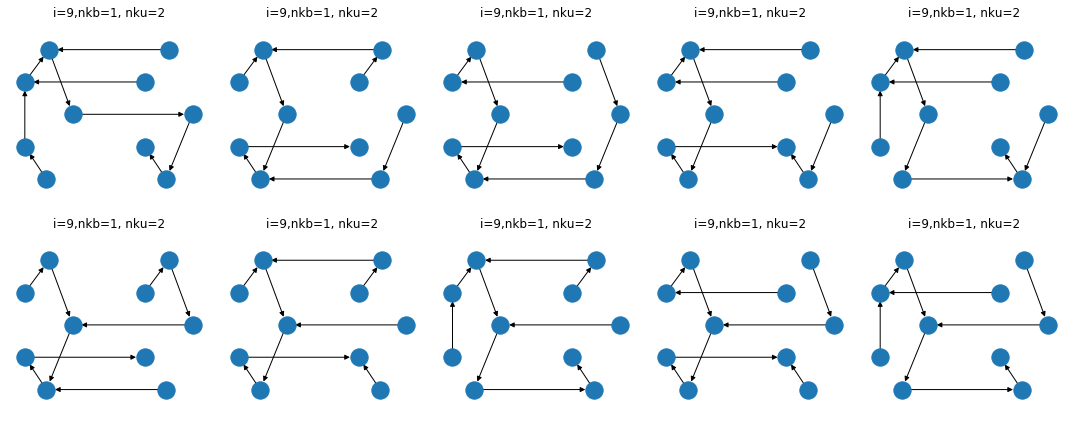

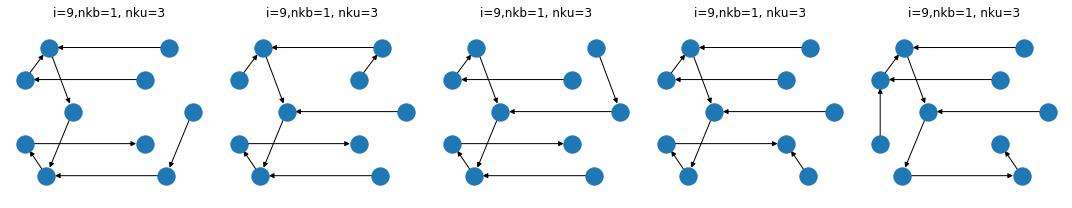

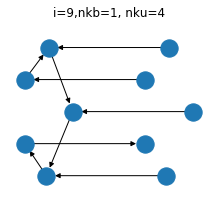

rooted at node 8


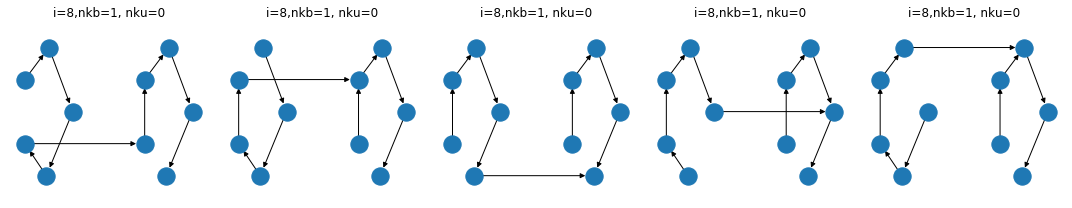

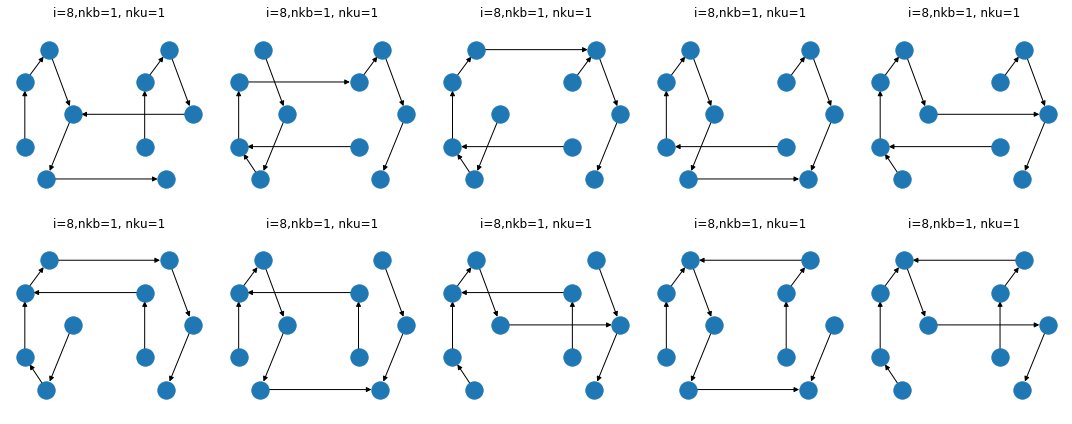

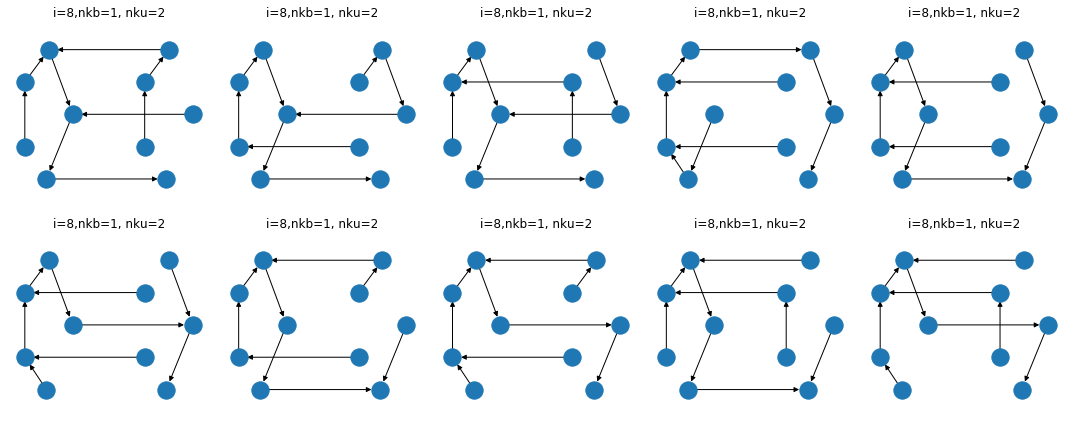

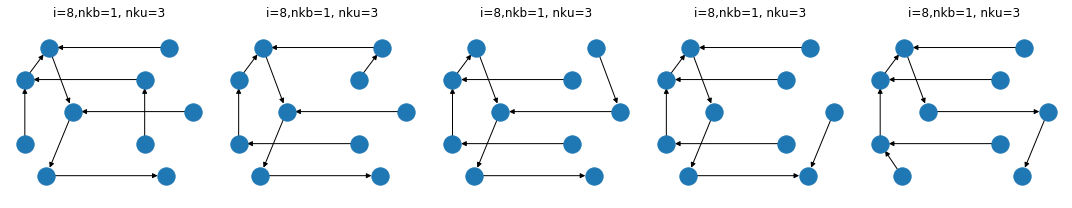

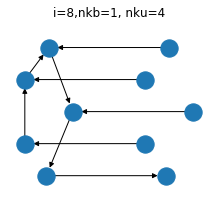

rooted at node 7


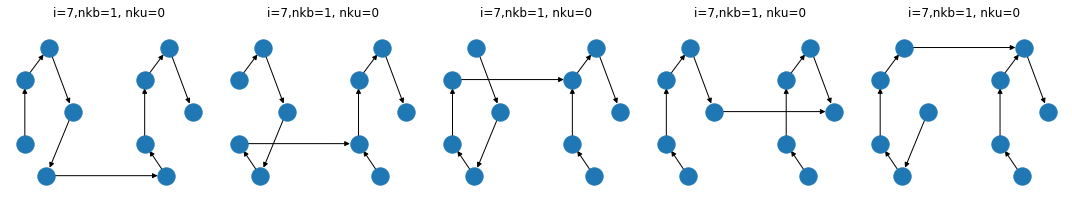

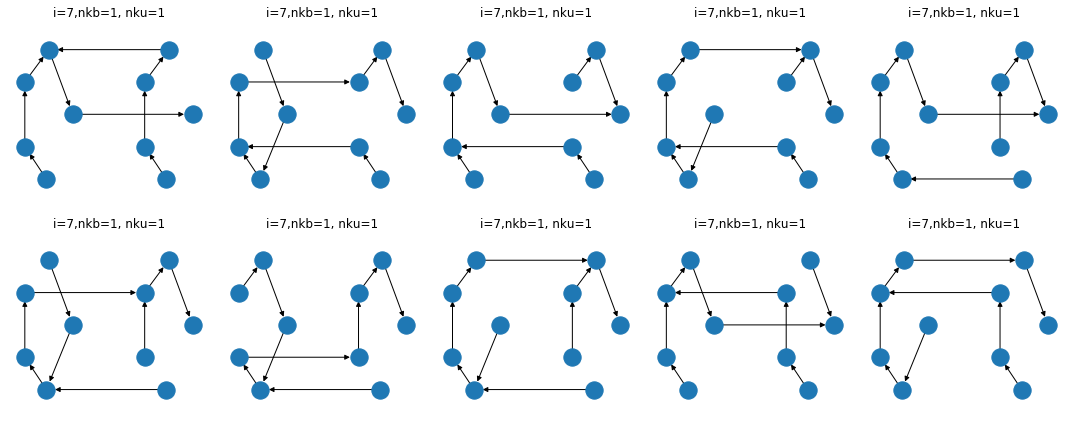

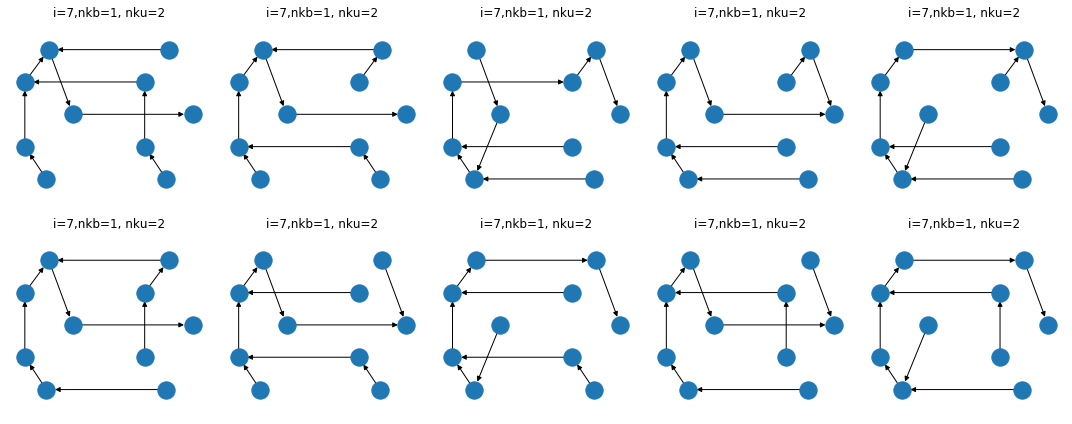

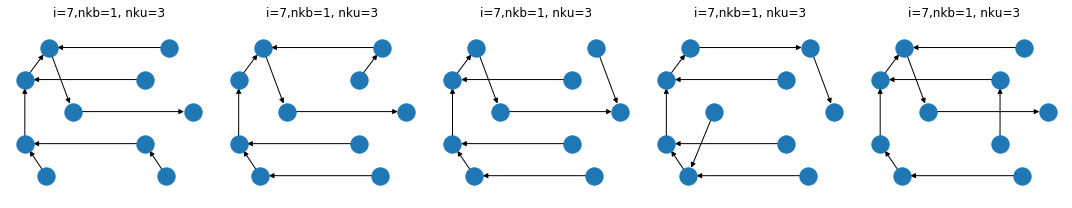

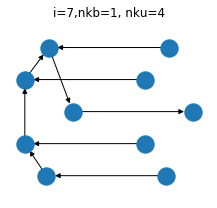

rooted at node 6


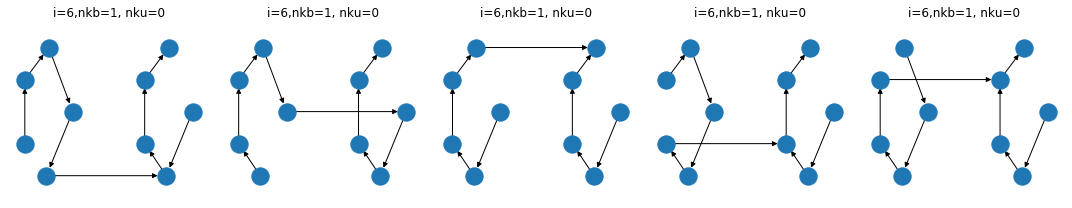

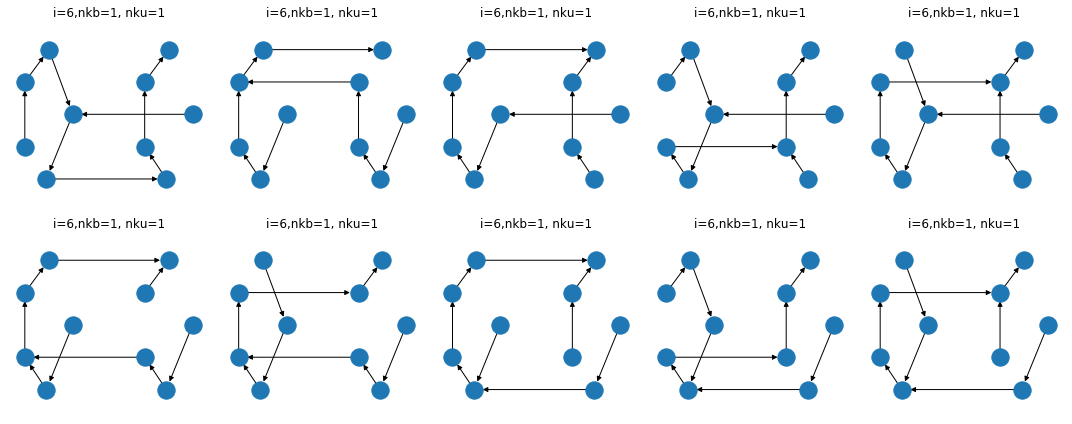

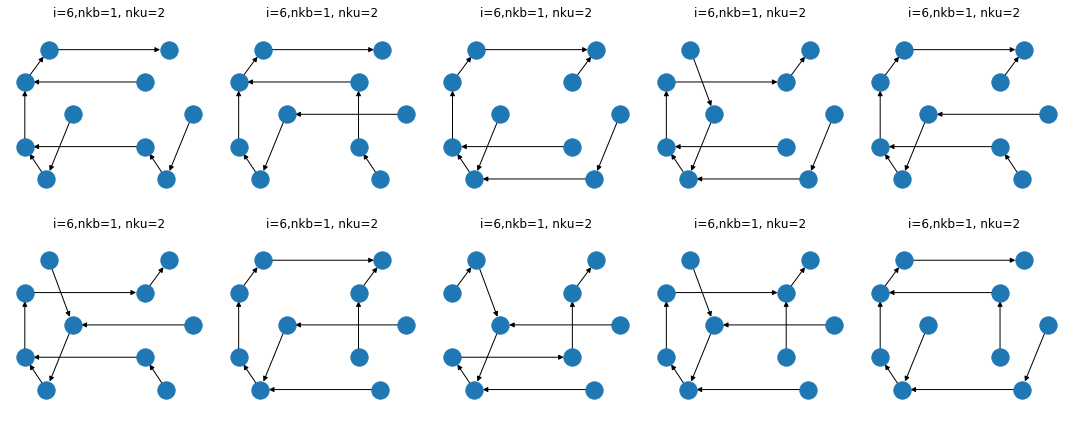

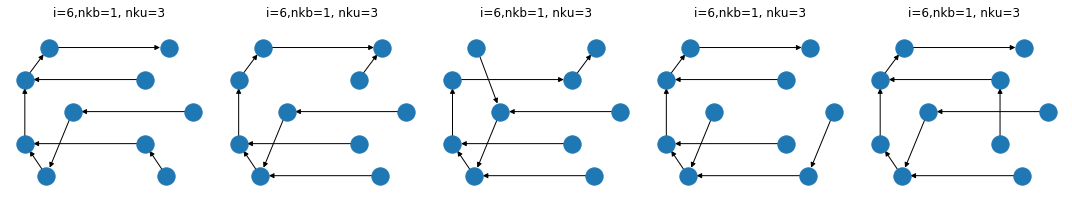

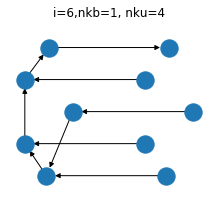

rooted at node 5


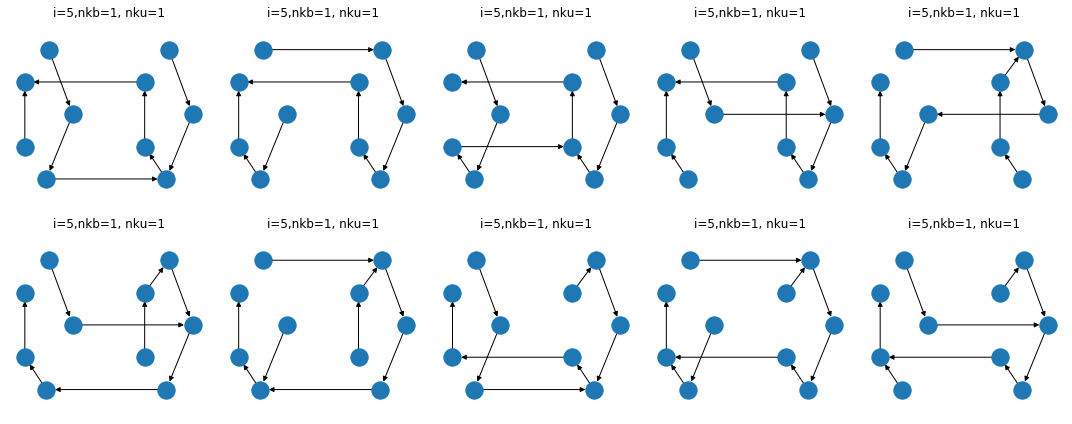

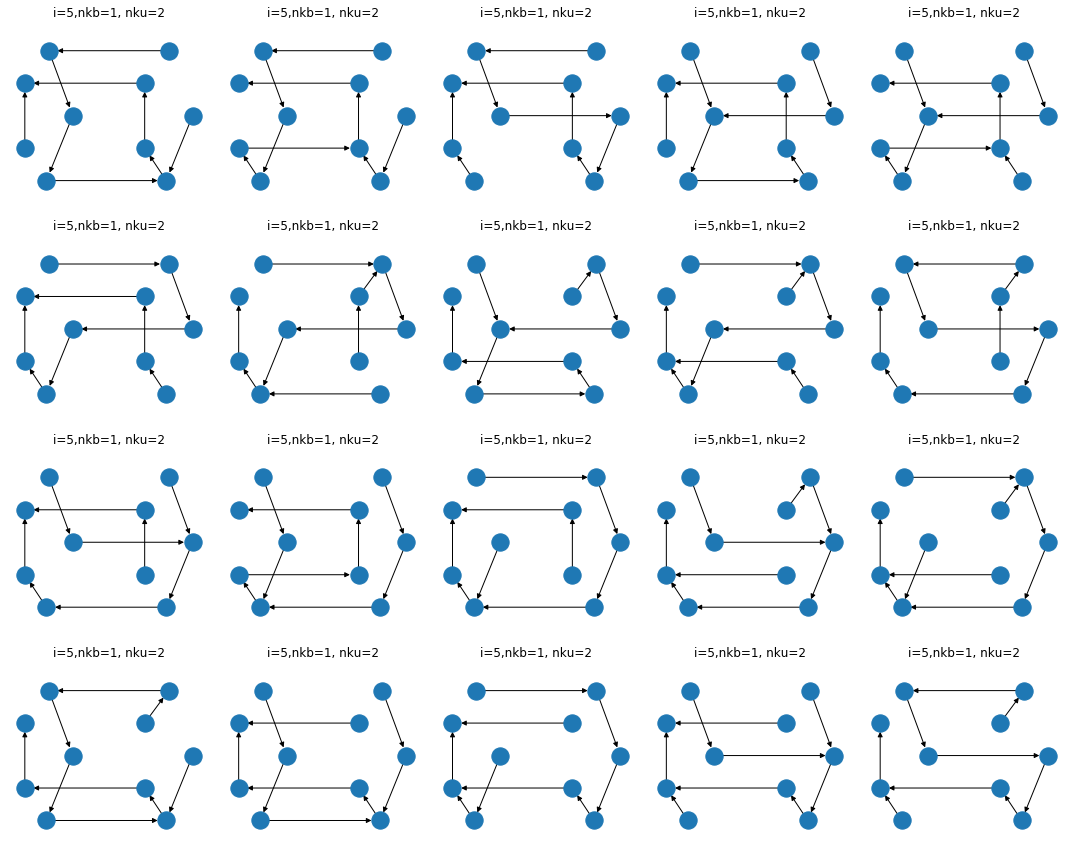

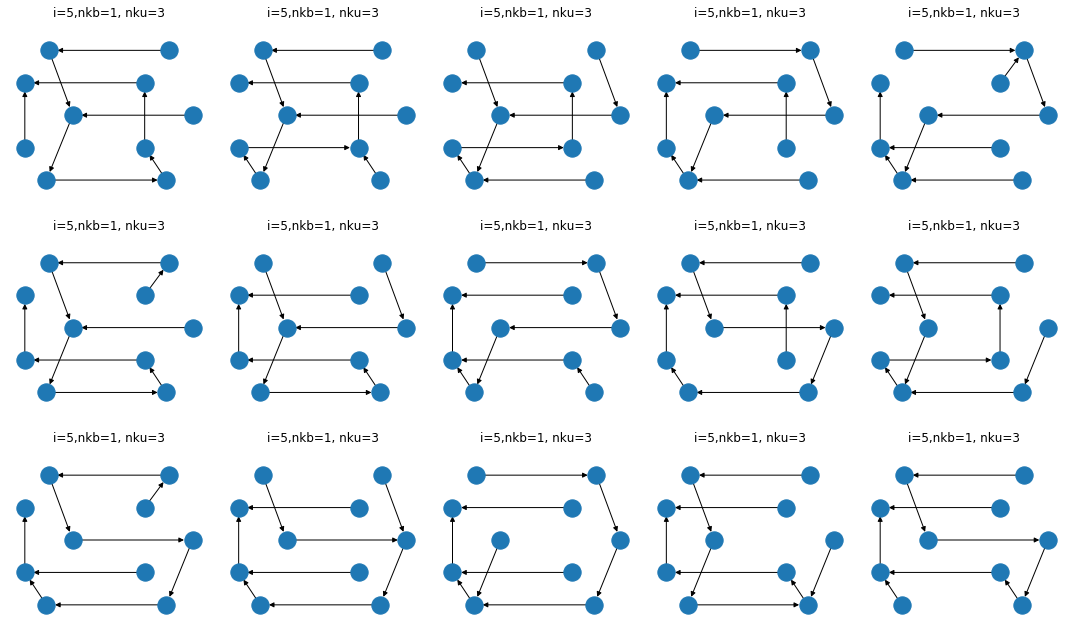

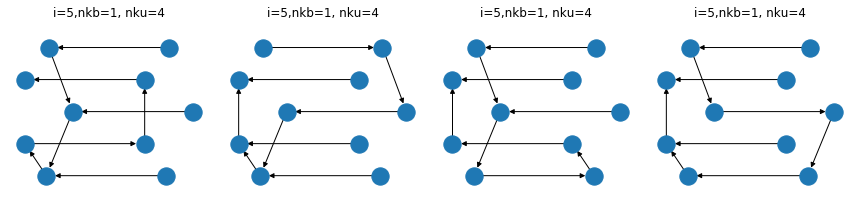

rooted at node 4


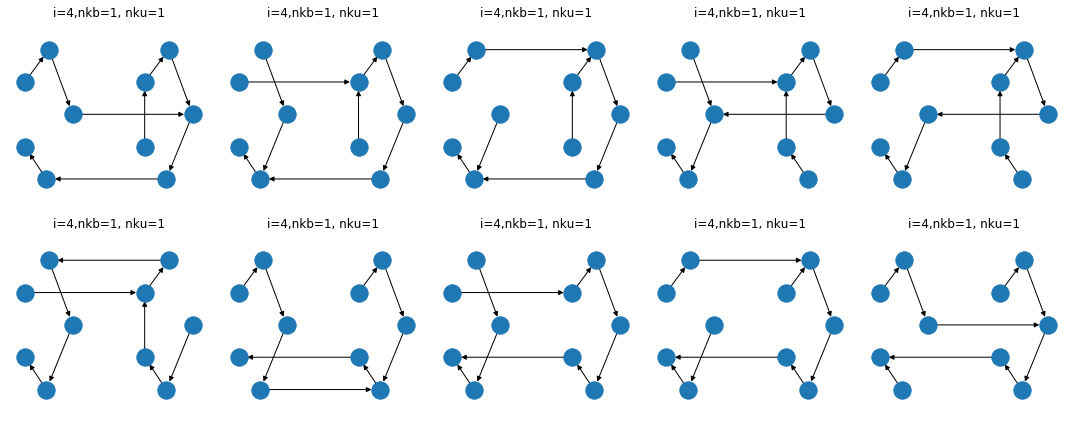

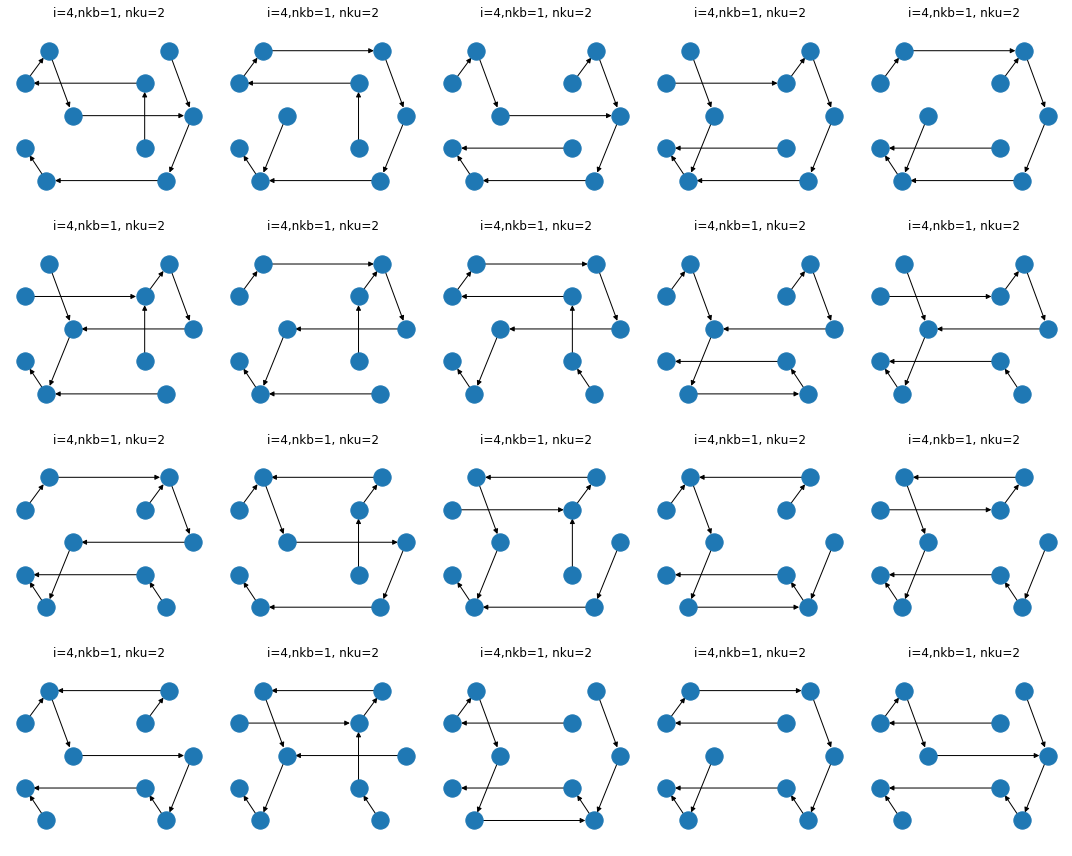

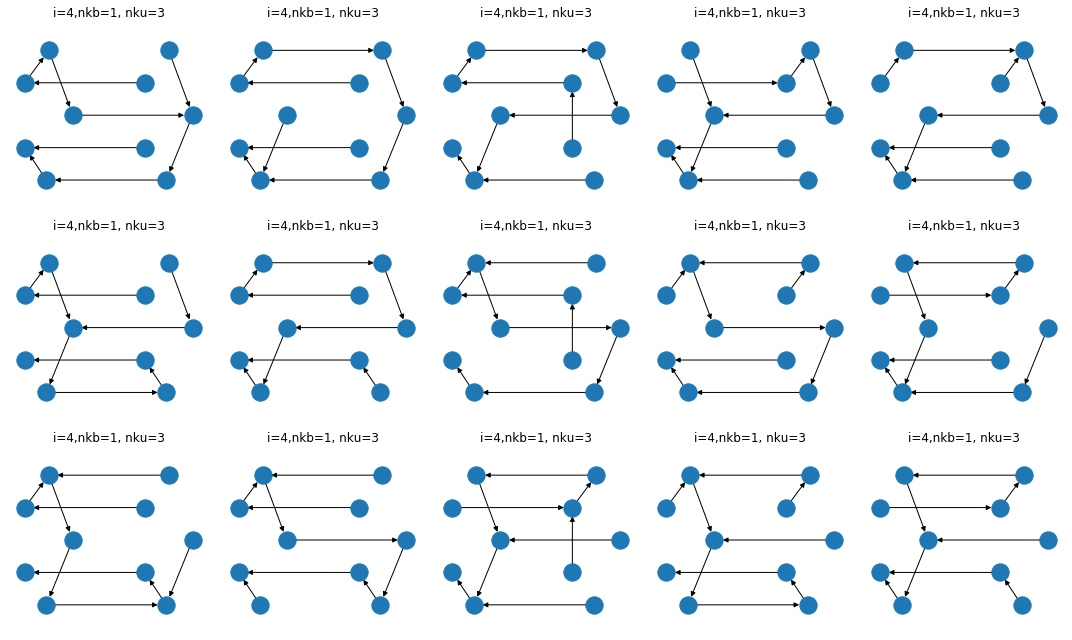

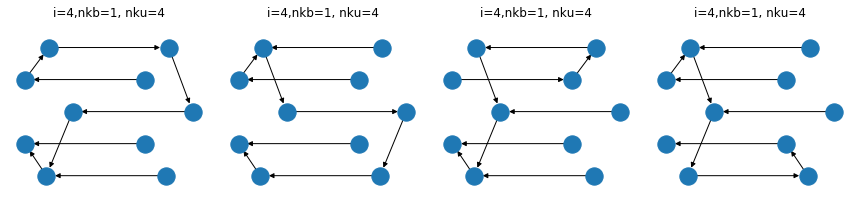

rooted at node 3


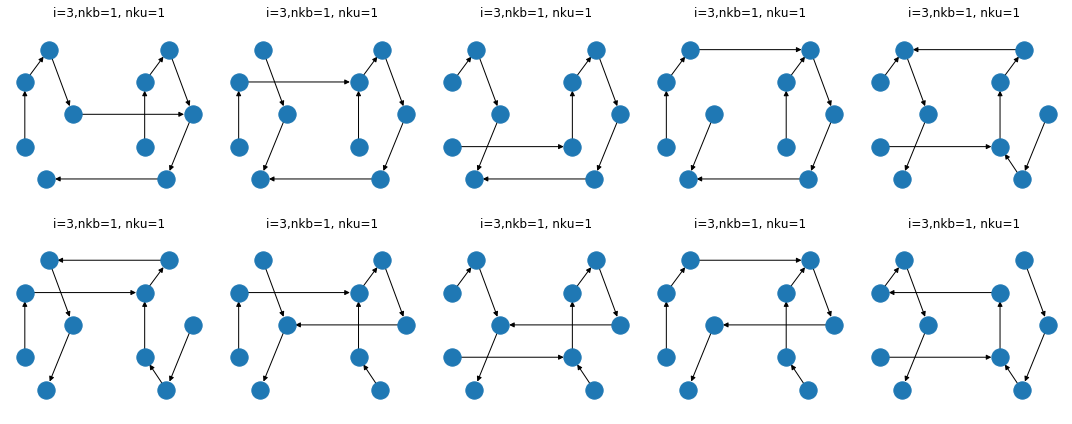

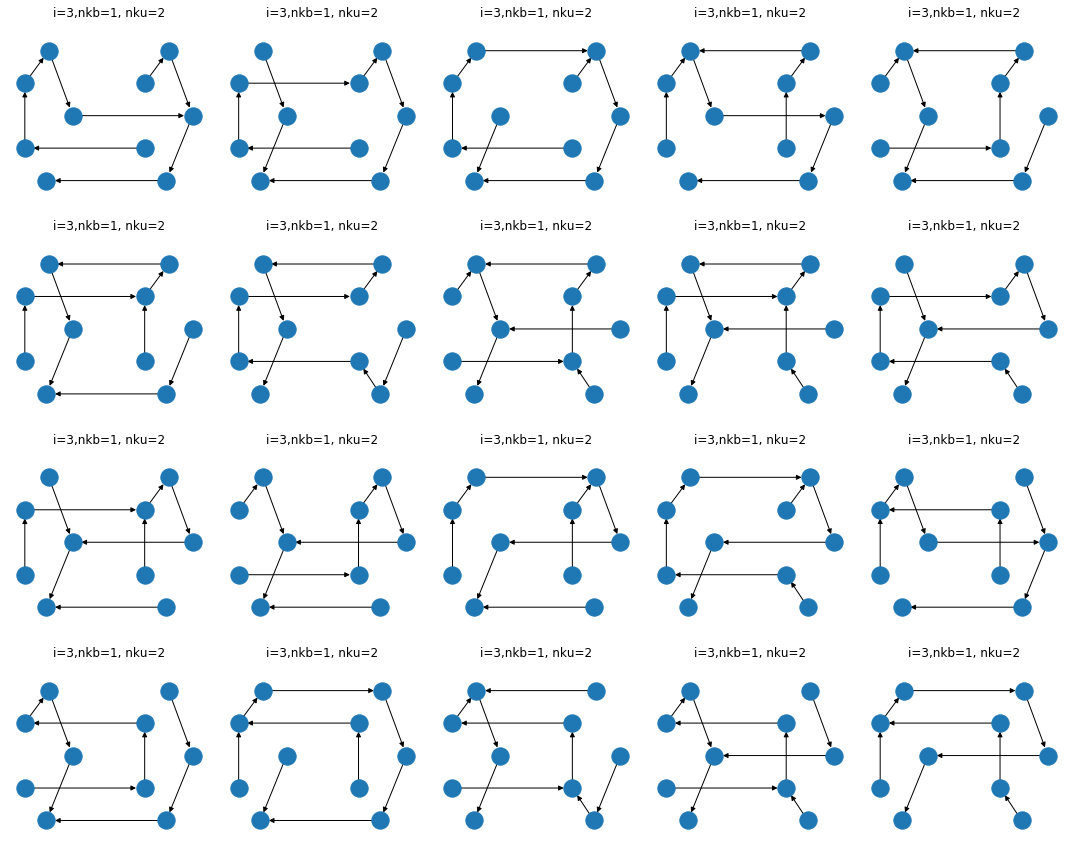

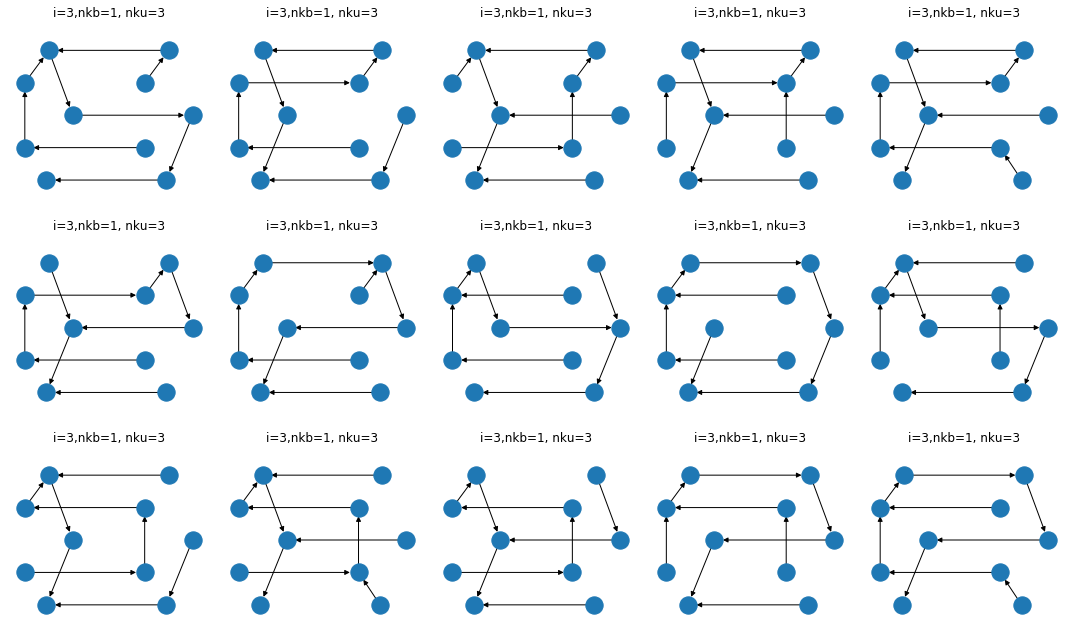

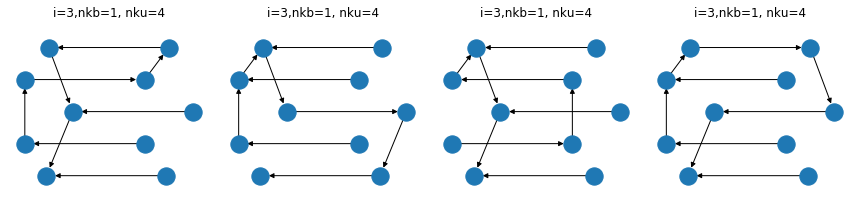

rooted at node 2


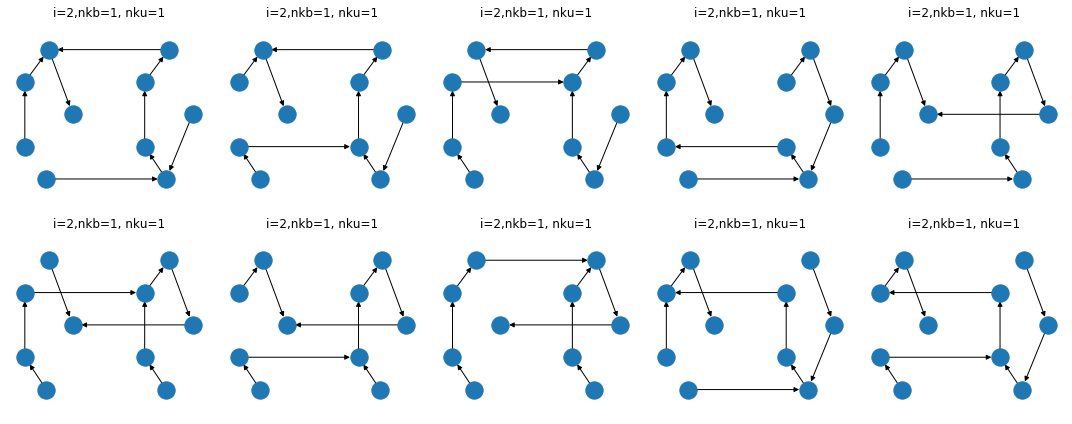

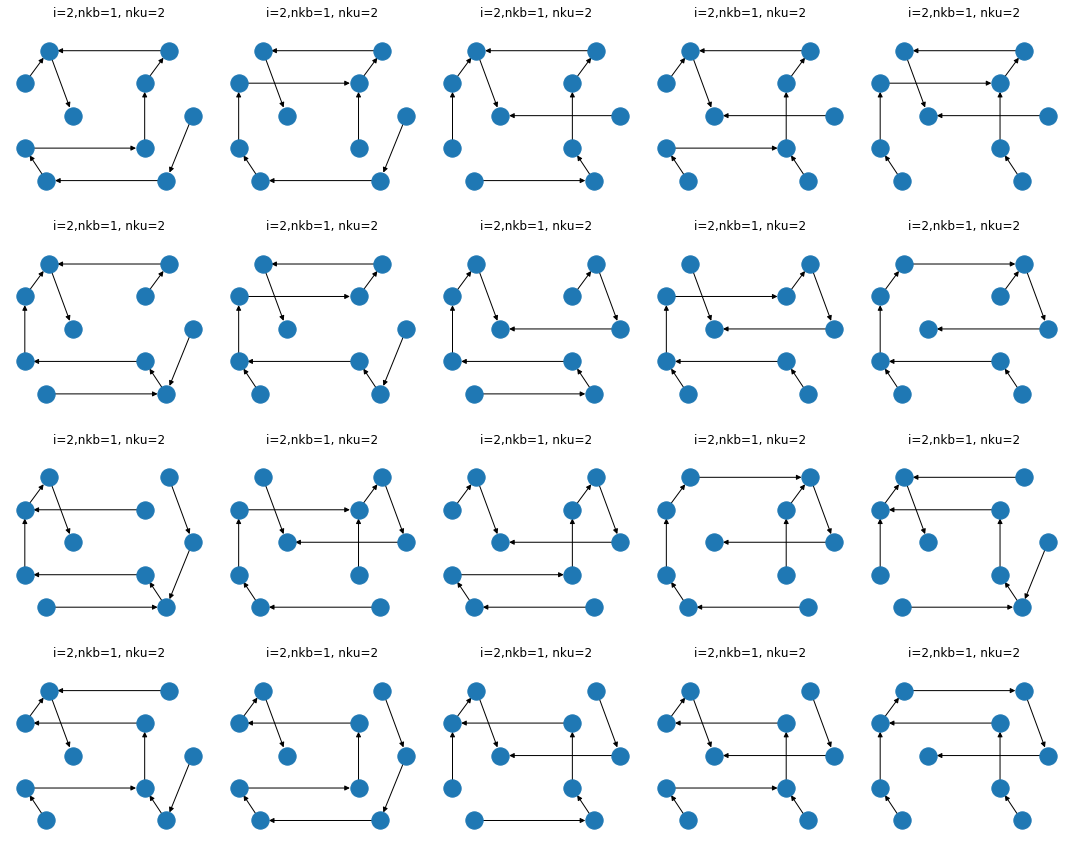

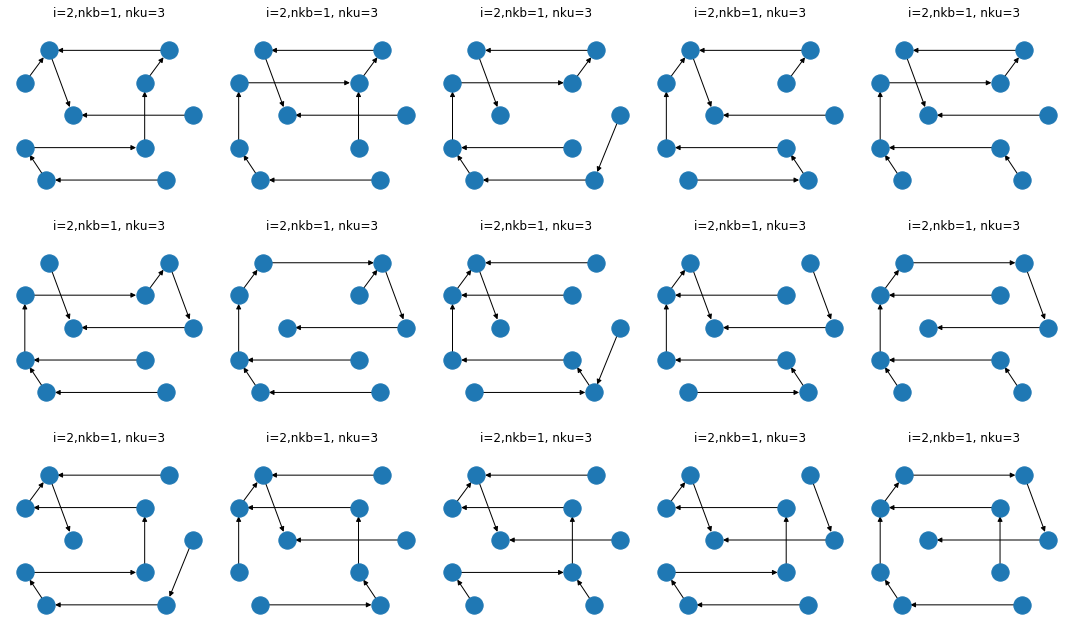

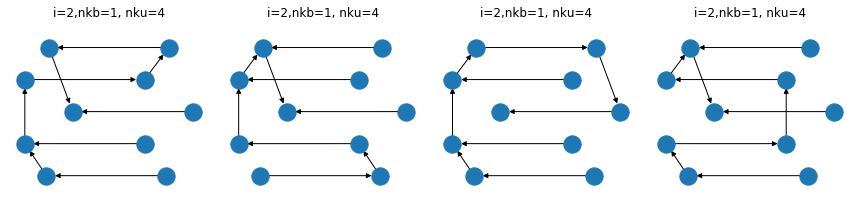

rooted at node 1


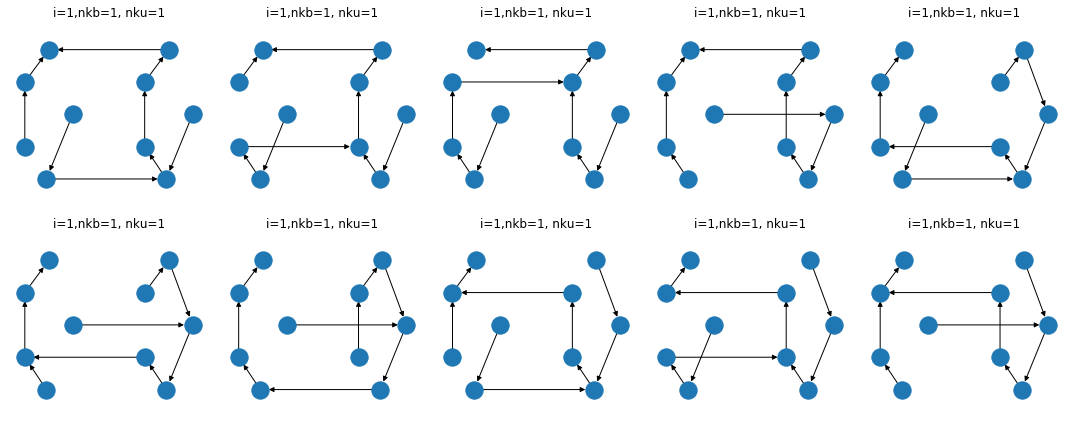

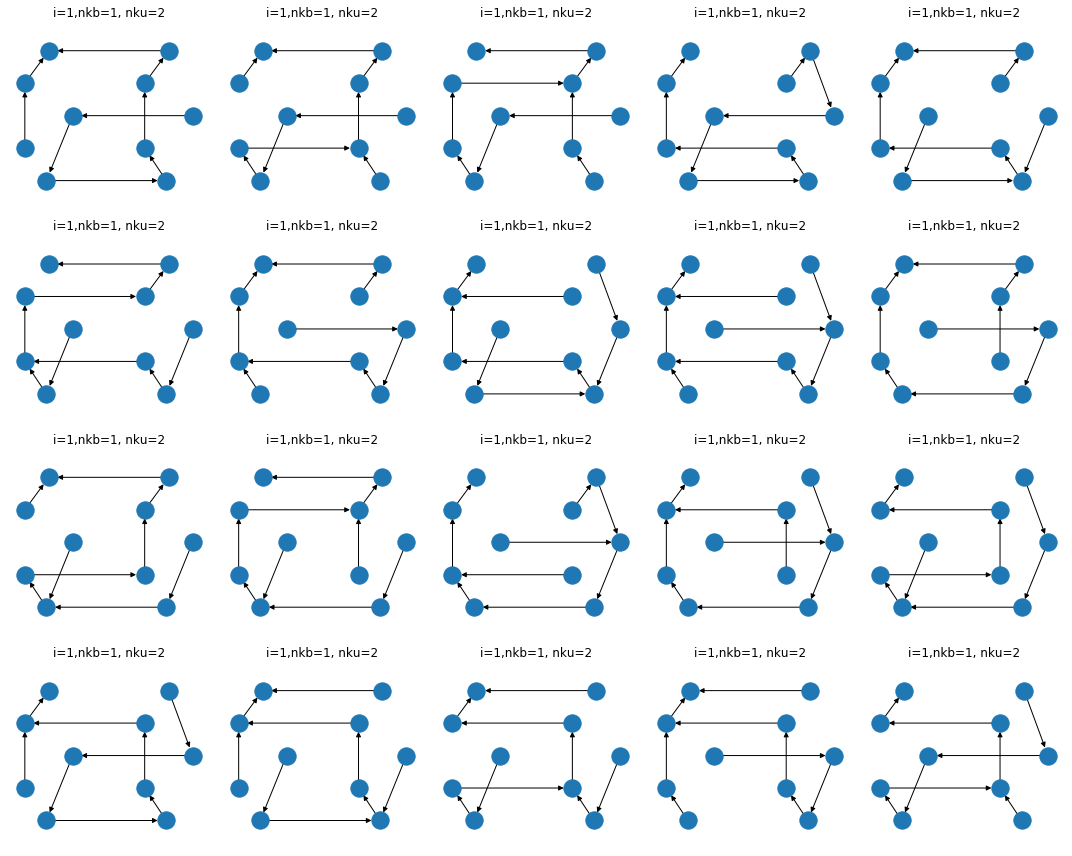

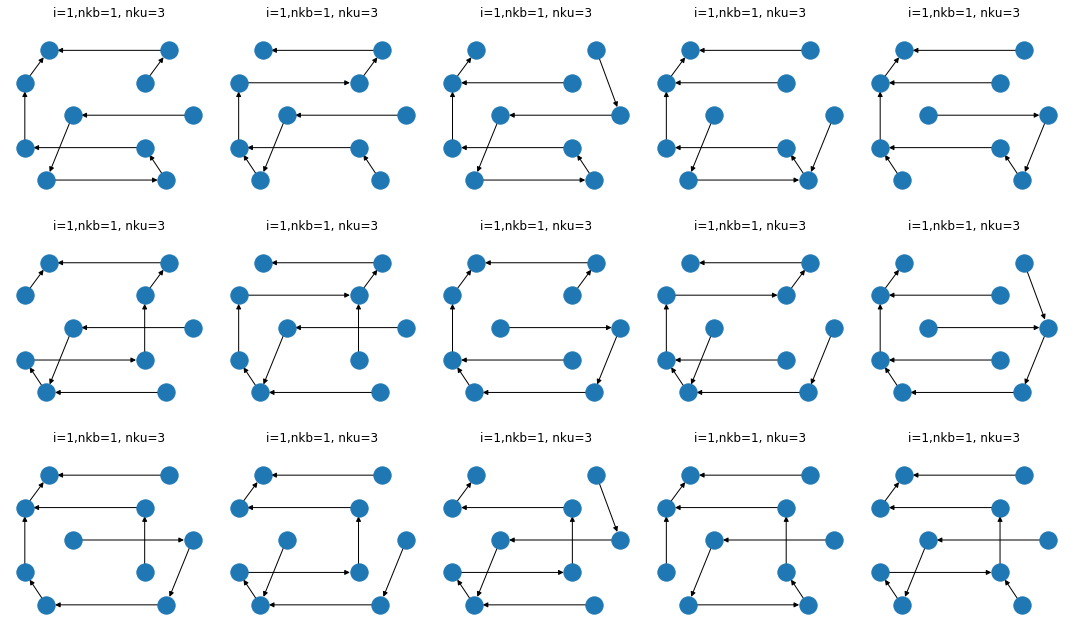

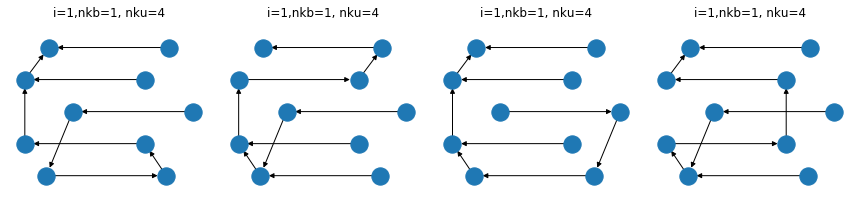

0
rooted at node 10
rooted at node 9
rooted at node 8
rooted at node 7
rooted at node 6
rooted at node 5


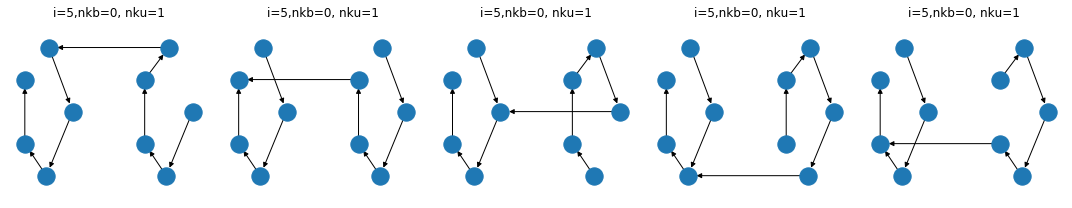

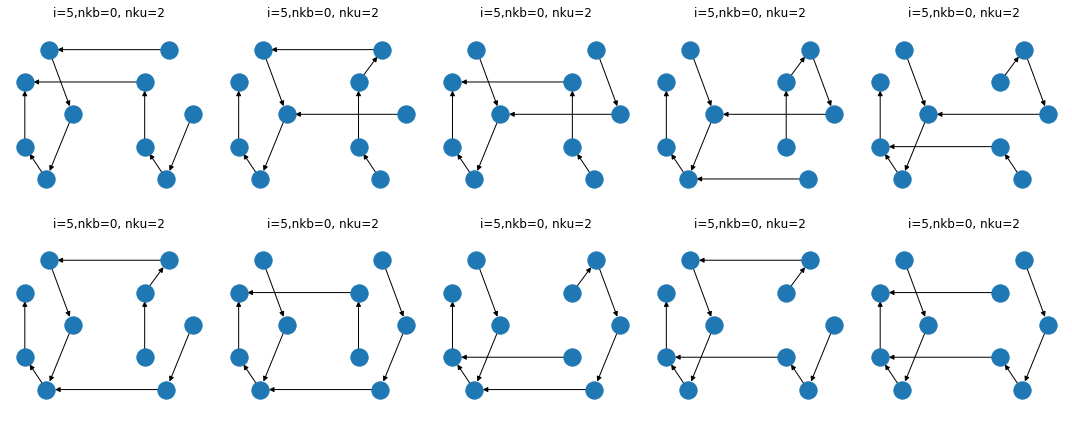

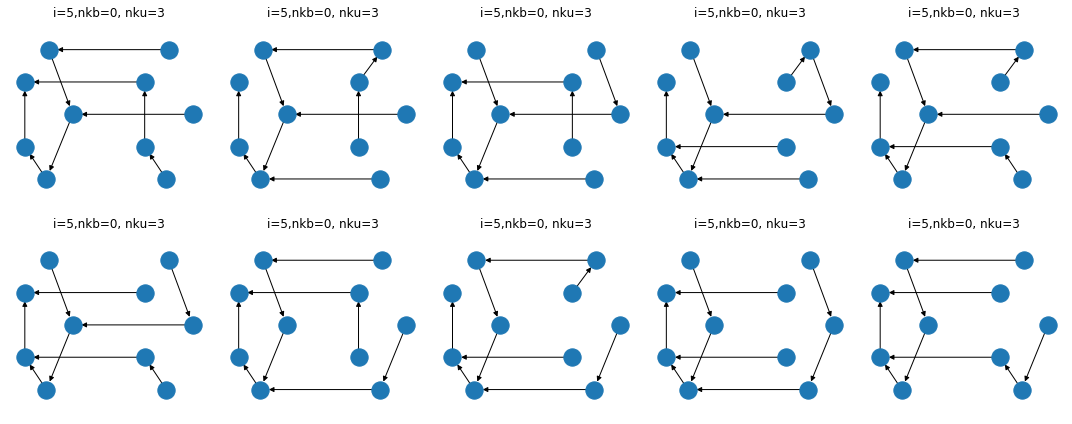

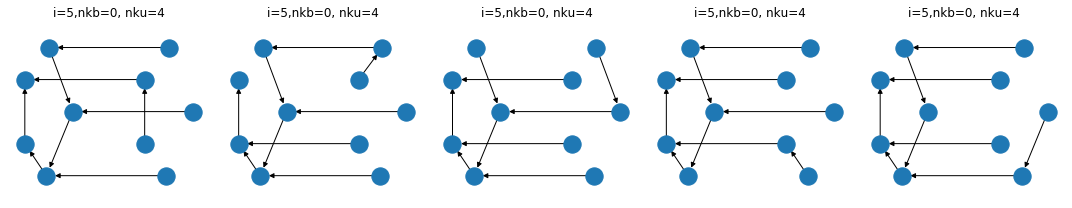

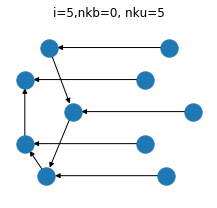

rooted at node 4


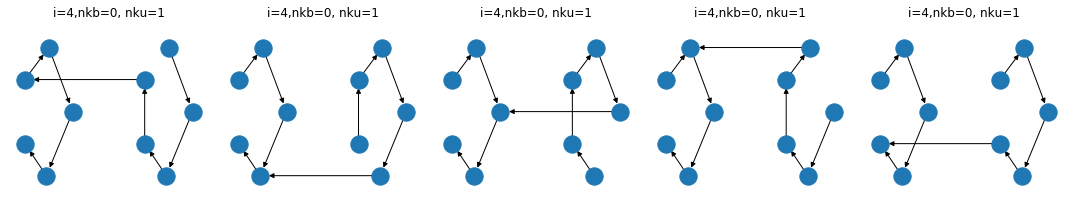

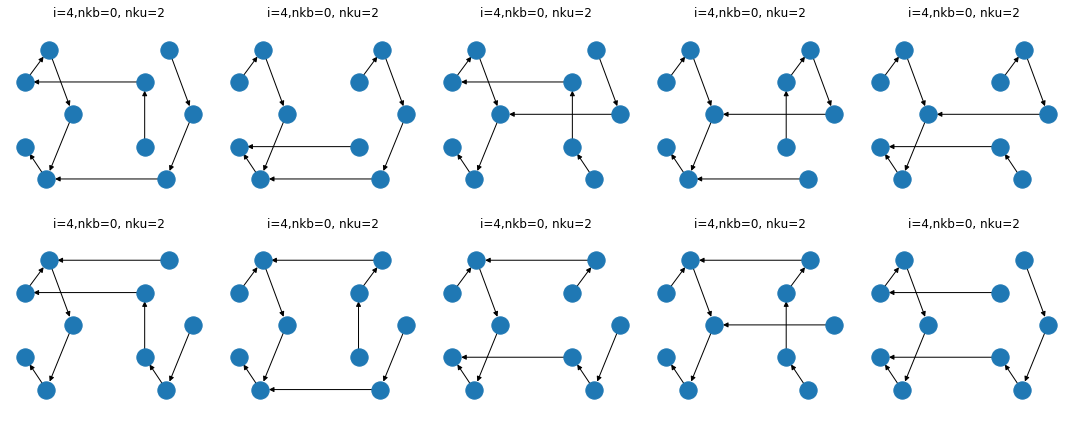

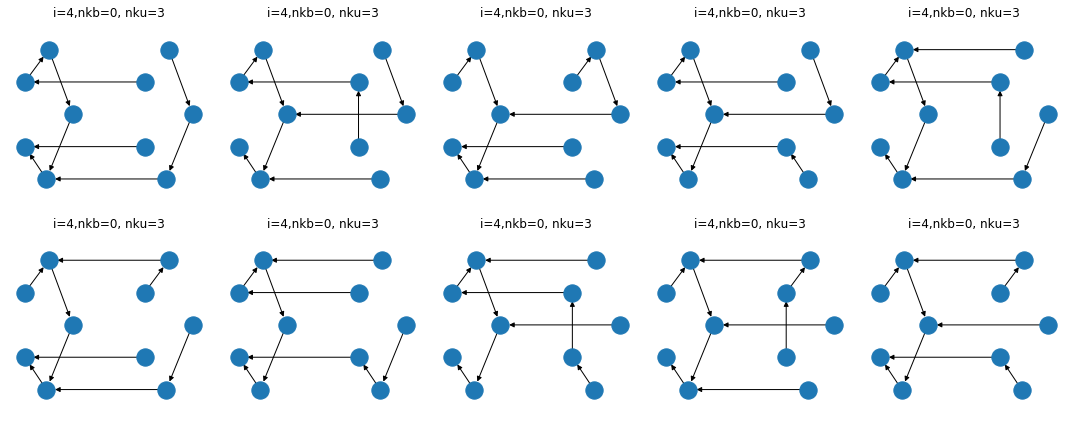

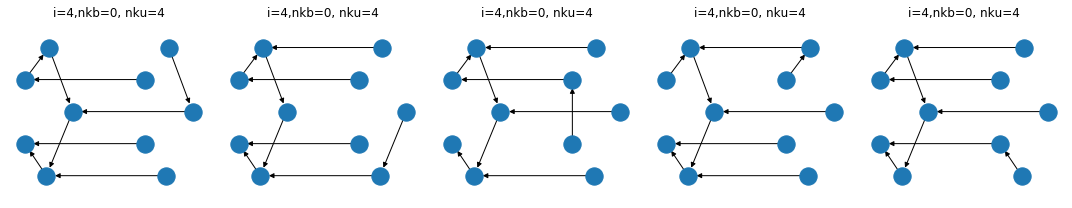

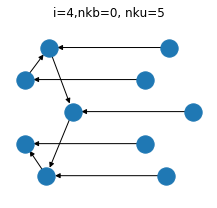

rooted at node 3


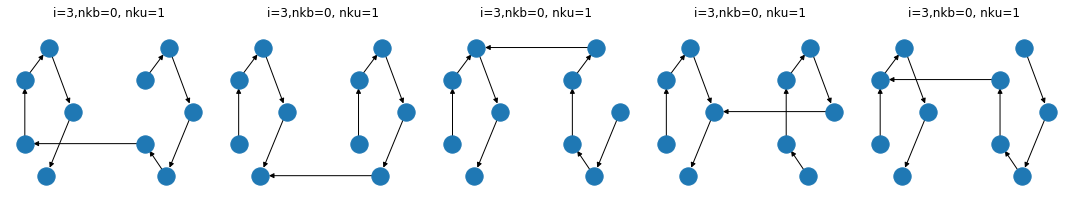

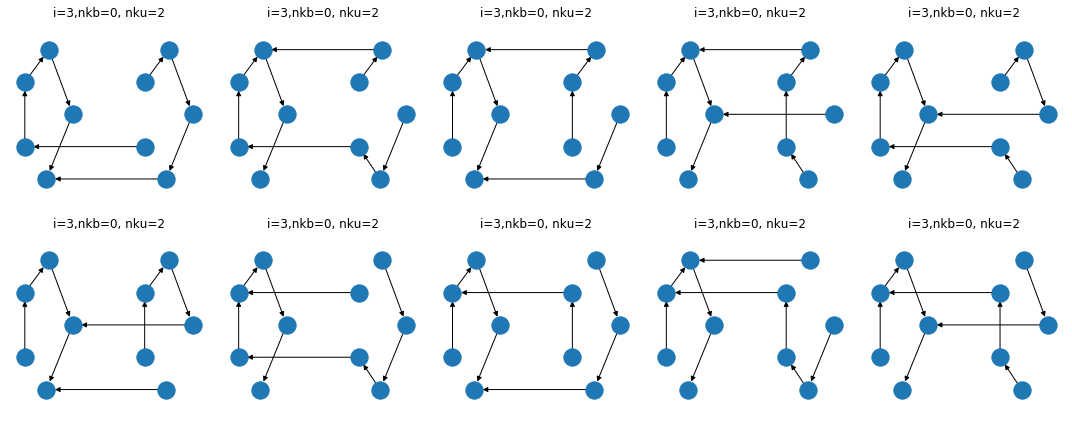

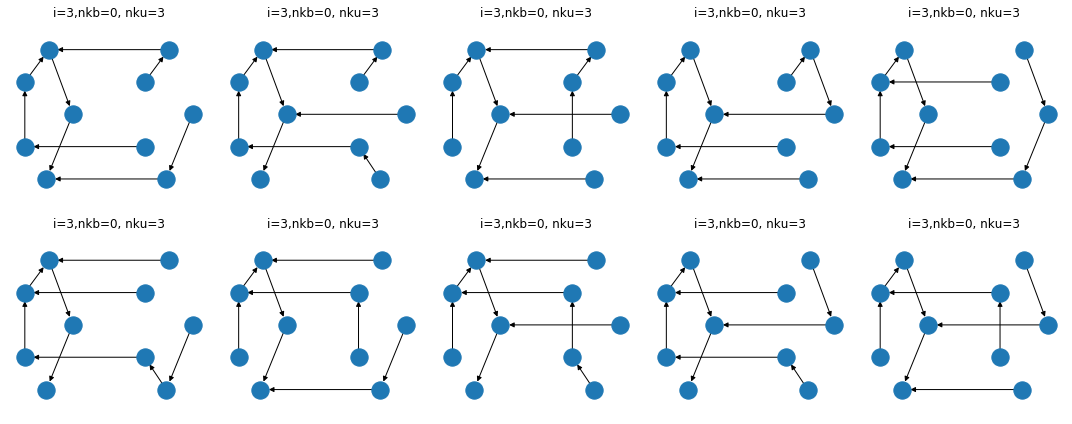

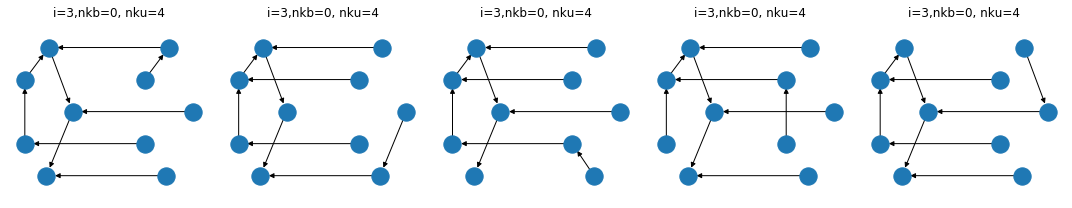

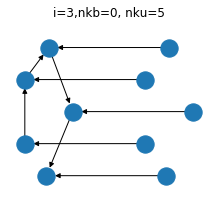

rooted at node 2


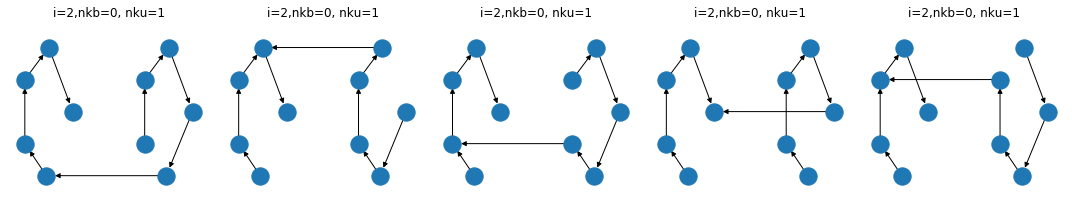

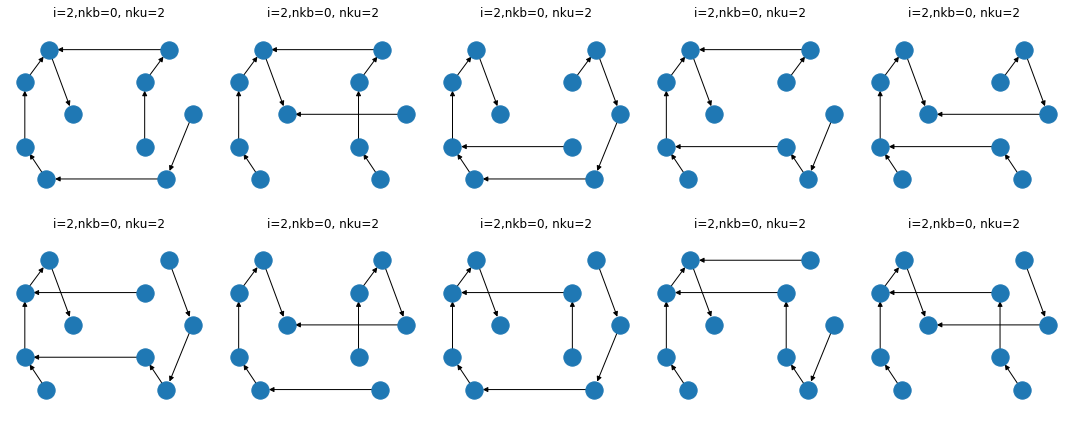

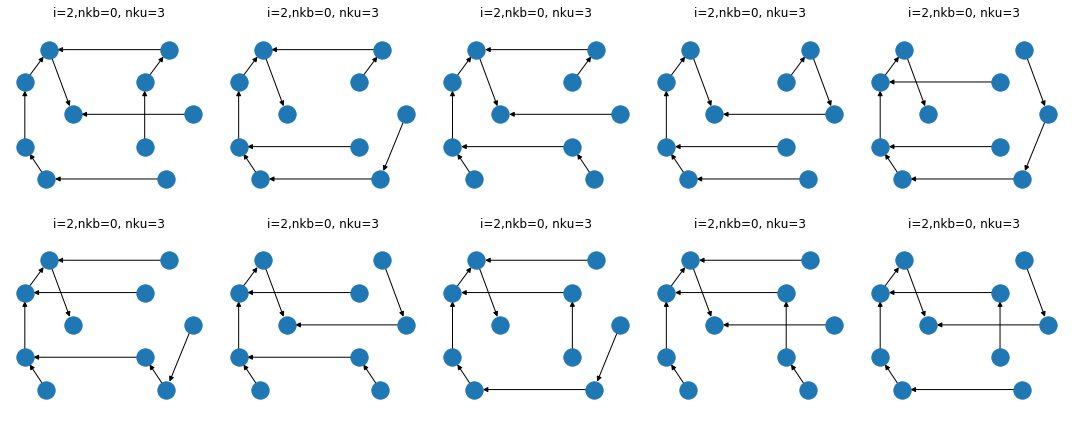

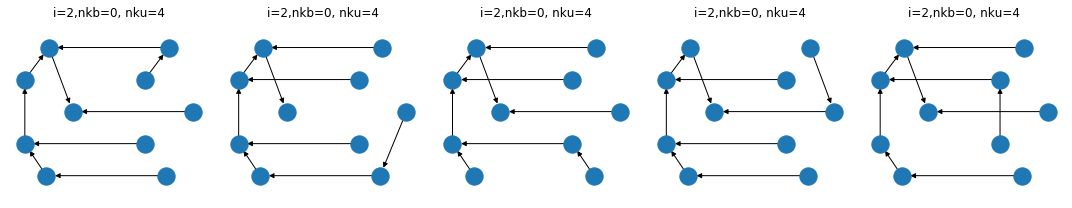

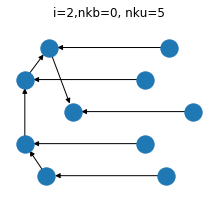

rooted at node 1


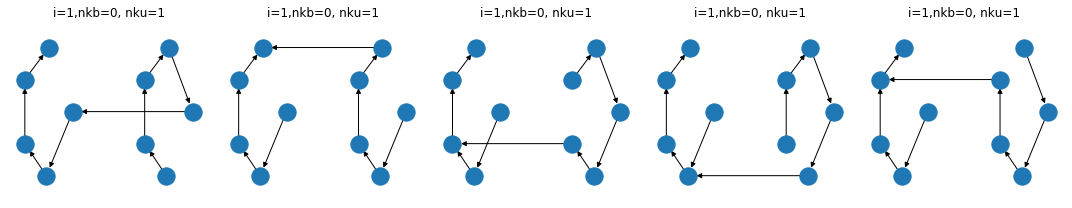

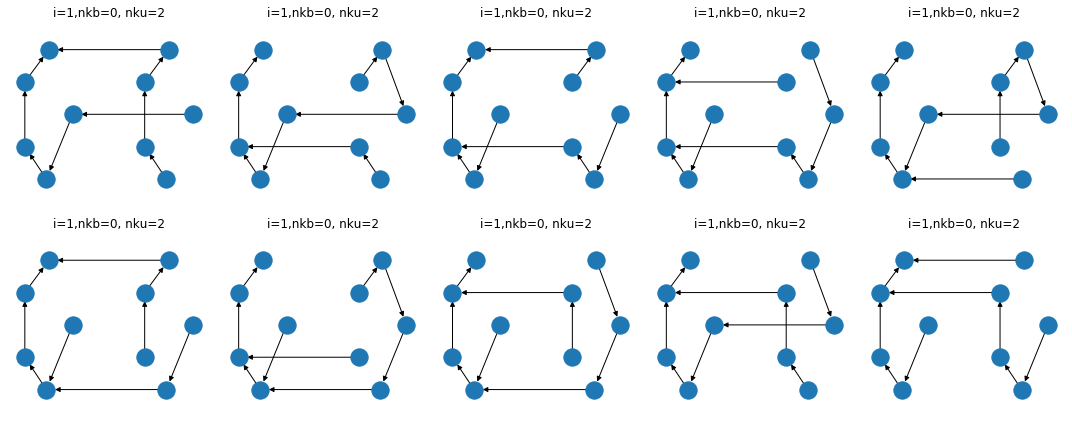

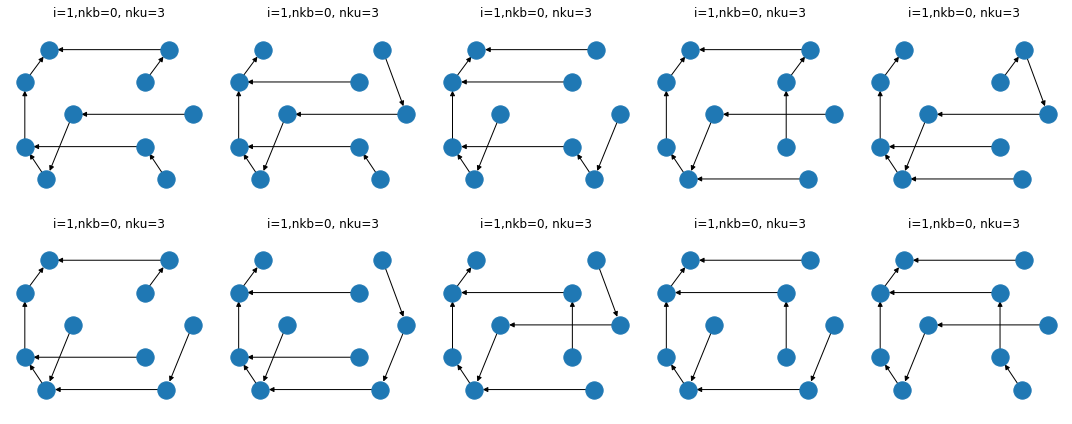

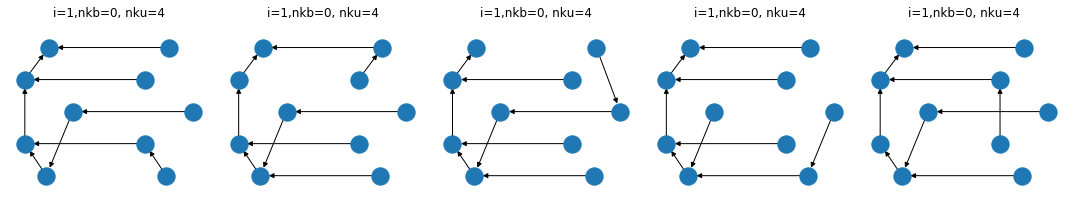

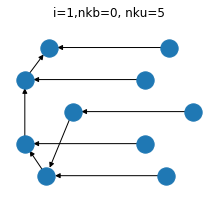

In [19]:
maxnkbs=0
for node in nkbsdict.keys():
    max_=max(nkbsdict[node])
    if max_>maxnkbs:
        maxnkbs=max_
print(maxnkbs)
for nkb in np.arange(0,maxnkbs+1)[::-1]:
    print(nkb)
    for node in np.arange(1,nnodes+1)[::-1]:
        print("rooted at node", node)
        nkbs=nkbsdict[node]
        idxs=np.where(nkbs==nkb)[0]
        
        if len(idxs)>0:
            nkus=nkusdict[node][idxs]
            maxnkus=max(nkus)
            minnkus=min(nkus)
            Gs_=[allGraphs[node][x] for x in idxs]
            terms_=[allterms[node][x] for x in idxs]
            for ku in range(minnkus,maxnkus+1):
                idxsku=np.where(nkus==ku)[0]
                Gs=[Gs_[x] for x in idxsku]
                terms=[terms_[x] for x in idxsku]
            
                ncol=5
                nrow=np.ceil(len(Gs)/ncol)

                fig=plt.figure(figsize=(3*ncol,3*nrow))
                for gidx in range(len(Gs)):
                    G=Gs[gidx]
                    ax=fig.add_subplot(nrow,ncol,gidx+1)
                    nx.draw(G,pos=coords)
                    ax.set_title("i=%d,nkb=%d, nku=%d"%(node,nkb,ku)) #,terms[gidx]))
                plt.tight_layout()
                plt.show()
            
            
        
        
        

In [14]:
print(maxnkbs)
for nkb in np.arange(0,maxnkbs+1)[::-1]:
    
    for node in np.arange(1,nnodes+1)[::-1]:
        nkbs=nkbsdict[node]
        idxs=np.where(nkbs==nkb)[0]
        if len(idxs)>0:
            #print(idxs)
            Gs=[allGraphs[node][x] for x in idxs]
            terms=[allterms[node][x] for x in idxs]
            if node==6:
                star="*alpha3"
            elif node==3:
                star="*"
            else:
                star=""
            print(nkb,node,star,terms)
    print()

4
4 8  ['alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x*kb4-x']
4 7  ['alpha1*alpha2*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']
4 6 *alpha3 ['alpha1*alpha3*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']
4 5  ['alpha2*alpha3*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']

3 8  ['a3*alpha1*alpha2*kb1-x*kb2-x*ku3*kb4-x', 'a3*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb4-x', 'a4*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x', 'a2*alpha1*alpha2*alpha3*kb1-x*kb3-x*kb4-x', 'a1*alpha1*alpha2*alpha3*kb2-x*kb3-x*kb4-x', 'a1*alpha2*alpha3*ku1*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha3*kb1-x*ku2*kb3-x*kb4-x']
3 7  ['a4*alpha1*alpha2*kb1-x*kb2-x*kb3-x*ku4', 'a4*alpha1*alpha2*alpha4*kb1-x*kb2-x*kb3-x', 'a2*alpha1*alpha2*alpha4*kb1-x*kb3-x*kb4-x', 'a3*alpha1*alpha2*alpha4*kb1-x*kb2-x*kb4-x', 'a1*alpha1*alpha2*alpha4*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha4*kb1-x*ku2*kb3-x*kb4-x', 'a1*alpha2*alpha4*ku1*kb2-x*kb3-x*kb4-x']
3 6 *alpha3 ['a4*alpha1*alpha3*alpha4*kb1-x*kb2-x*kb3-x', 'a1*alpha1*alpha3*alpha4*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha3*alpha4*kb1-x*kb3-x*kb4-x', 'a

In [ ]:
4
4 8  ['alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x*kb4-x']
4 7  ['alpha1*alpha2*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']
4 6 *alpha3 ['alpha1*alpha3*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']
4 5  ['alpha2*alpha3*alpha4*kb1-x*kb2-x*kb3-x*kb4-x']

3 8  ['a3*alpha1*alpha2*kb1-x*kb2-x*ku3*kb4-x', 'a3*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb4-x', 'a4*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x', 'a2*alpha1*alpha2*alpha3*kb1-x*kb3-x*kb4-x', 'a1*alpha1*alpha2*alpha3*kb2-x*kb3-x*kb4-x', 'a1*alpha2*alpha3*ku1*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha3*kb1-x*ku2*kb3-x*kb4-x']
3 7  ['a4*alpha1*alpha2*kb1-x*kb2-x*kb3-x*ku4', 'a4*alpha1*alpha2*alpha4*kb1-x*kb2-x*kb3-x', 'a2*alpha1*alpha2*alpha4*kb1-x*kb3-x*kb4-x', 'a3*alpha1*alpha2*alpha4*kb1-x*kb2-x*kb4-x', 'a1*alpha1*alpha2*alpha4*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha4*kb1-x*ku2*kb3-x*kb4-x', 'a1*alpha2*alpha4*ku1*kb2-x*kb3-x*kb4-x']
3 6 *alpha3 ['a4*alpha1*alpha3*alpha4*kb1-x*kb2-x*kb3-x', 'a1*alpha1*alpha3*alpha4*kb2-x*kb3-x*kb4-x', 'a2*alpha1*alpha3*alpha4*kb1-x*kb3-x*kb4-x', 'a3*alpha1*alpha3*alpha4*kb1-x*kb2-x*kb4-x', 'a4*alpha1*alpha3*kb1-x*kb2-x*kb3-x*ku4', 'a3*alpha1*alpha4*kb1-x*kb2-x*ku3*kb4-x', 'a1*alpha3*alpha4*ku1*kb2-x*kb3-x*kb4-x']
3 5  ['a2*alpha3*alpha4*kb1-x*ku2*kb3-x*kb4-x', 'a2*alpha2*alpha3*alpha4*kb1-x*kb3-x*kb4-x', 'a4*alpha2*alpha3*kb1-x*kb2-x*kb3-x*ku4', 'a4*alpha2*alpha3*alpha4*kb1-x*kb2-x*kb3-x', 'a1*alpha2*alpha3*alpha4*kb2-x*kb3-x*kb4-x', 'a3*alpha2*alpha3*alpha4*kb1-x*kb2-x*kb4-x', 'a3*alpha2*alpha4*kb1-x*kb2-x*ku3*kb4-x']
3 4  ['alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x*ku4']
3 3 * ['alpha1*alpha2*alpha4*kb1-x*kb2-x*ku3*kb4-x']
3 2  ['alpha1*alpha3*alpha4*kb1-x*ku2*kb3-x*kb4-x']
3 1  ['alpha2*alpha3*alpha4*ku1*kb2-x*kb3-x*kb4-x']

In [ ]:
kbi becomes ai: there are n possibilities
8:['alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x*kb4-x']
'a3*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb4-x',
'a4*alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x'
'a2*alpha1*alpha2*alpha3*kb1-x*kb3-x*kb4-x',
'a1*alpha1*alpha2*alpha3*kb2-x*kb3-x*kb4-x', 

In [ ]:
keep kb to root. keep all other kb except one, that becomes ku. then the node that receives kui gets ai.
n-1 possibilities:
8:['alpha1*alpha2*alpha3*kb1-x*kb2-x*kb3-x*kb4-x']
'a3*alpha1*alpha2*kb1-x*kb2-x*ku3*kb4-x', 
 'a1*alpha2*alpha3*ku1*kb2-x*kb3-x*kb4-x', 
 'a2*alpha1*alpha3*kb1-x*ku2*kb3-x*kb4-x'
